In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

## Wars

In [2]:
path = "data/"
filename = "wars.csv"
df = pd.read_csv(path + filename)
df.head()

,WarNum,WarName,WarType,ccode,StateName,Side,StartMonth1,StartDay1,StartYear1,EndMonth1,...,EndMonth2,EndDay2,EndYear2,TransFrom,WhereFought,Initiator,Outcome,TransTo,BatDeath,Version
0,1,Franco-Spanish War,1,230,Spain,2,4,7,1823,11,...,-8,-8,-8,503,2,2,2,-8,600,4
1,1,Franco-Spanish War,1,220,France,1,4,7,1823,11,...,-8,-8,-8,503,2,1,1,-8,400,4
2,4,First Russo-Turkish,1,640,Ottoman Empire,2,4,26,1828,9,...,-8,-8,-8,506,11,2,2,-8,80000,4
3,4,First Russo-Turkish,1,365,Russia,1,4,26,1828,9,...,-8,-8,-8,506,11,1,1,-8,50000,4
4,7,Mexican-American,1,70,Mexico,2,4,25,1846,9,...,-8,-8,-8,-8,1,2,2,-8,6000,4


In [3]:
df.columns

Index(['WarNum', 'WarName', 'WarType', 'ccode', 'StateName', 'Side',
       'StartMonth1', 'StartDay1', 'StartYear1', 'EndMonth1', 'EndDay1',
       'EndYear1', 'StartMonth2', 'StartDay2', 'StartYear2', 'EndMonth2',
       'EndDay2', 'EndYear2', 'TransFrom', 'WhereFought', 'Initiator',
       'Outcome', 'TransTo', 'BatDeath', 'Version'],
      dtype='object')

In [4]:
df["StartYear"] = df[["StartYear1", "StartYear2"]].max(axis=1)
df["EndYear"] = df[["EndYear1", "EndYear2"]].max(axis=1)
df.columns

Index(['WarNum', 'WarName', 'WarType', 'ccode', 'StateName', 'Side',
       'StartMonth1', 'StartDay1', 'StartYear1', 'EndMonth1', 'EndDay1',
       'EndYear1', 'StartMonth2', 'StartDay2', 'StartYear2', 'EndMonth2',
       'EndDay2', 'EndYear2', 'TransFrom', 'WhereFought', 'Initiator',
       'Outcome', 'TransTo', 'BatDeath', 'Version', 'StartYear', 'EndYear'],
      dtype='object')

In [5]:
df_clean = df[["WarName", "StateName", "Side", "StartYear", "EndYear", "WhereFought", "Outcome", "BatDeath"]]
df_clean.head()

,WarName,StateName,Side,StartYear,EndYear,WhereFought,Outcome,BatDeath
0,Franco-Spanish War,Spain,2,1823,1823,2,2,600
1,Franco-Spanish War,France,1,1823,1823,2,1,400
2,First Russo-Turkish,Ottoman Empire,2,1828,1829,11,2,80000
3,First Russo-Turkish,Russia,1,1828,1829,11,1,50000
4,Mexican-American,Mexico,2,1846,1847,1,2,6000


In [6]:
df_clean = df_clean[df_clean["EndYear"]>1894]
df_clean.head()

,WarName,StateName,Side,StartYear,EndYear,WhereFought,Outcome,BatDeath
76,First Sino-Japanese,China,2,1894,1895,7,2,10000
77,First Sino-Japanese,Japan,1,1894,1895,7,1,5000
78,Greco-Turkish,Greece,2,1897,1897,2,2,600
79,Greco-Turkish,Turkey,1,1897,1897,2,1,1400
80,Spanish-American,Spain,2,1898,1898,13,2,775


In [7]:
df_clean.loc[0,:] = ["Gaza-Israel conflict","Israel", 1, 2006, 2024, 6, 0, 1700]
df_clean.loc[1,:] = ["Gaza-Israel conflict","Palestine", 2, 2006, 2024, 6, 0, 44500]
df_clean.loc[2,:] = ["Russo-Georgian War", "Russia", 1, 2008, 2008, 12, 0, 70]
df_clean.loc[3,:] = ["Russo-Georgian War", "South Ossetia", 1, 2008, 2008, 12, 0, 70]
df_clean.loc[3,:] = ["Russo-Georgian War", "South Ossetia", 1, 2008, 2008, 12, 0, 365]
df_clean.loc[4,:] = ["Russo-Georgian War", "Abkhazia", 1, 2008, 2008, 12, 0, 70]
df_clean.loc[5,:] = ["Russo-Georgian War", "Georgia", 2, 2008, 2008, 12, 0, None]
df_clean.loc[6,:] = ["First Libyan Civil War", 'NATO', 1, 2011, 2011, 4, 0, None]
df_clean.loc[7,:] = ["First Libyan Civil War", 'Qatar', 1, 2011, 2011, 4, 0, None]
df_clean.loc[8,:] = ["First Libyan Civil War", 'Sweden', 1, 2011, 2011, 4, 0, None]
df_clean.loc[9,:] = ["First Libyan Civil War", 'United Arab Emirates', 1, 2011, 2011, 4, 0, None]
df_clean.loc[10,:] = ["First Libyan Civil War", "Libya", 2, 2011, 2011, 4, 0, 3000]
df_clean.loc[11,:] = ["Heglig Crisis", "Sudan", 1, 2012, 2012, 4, 0, 1200]
df_clean.loc[12,:] = ["Heglig Crisis", "South Sudan", 2, 2012, 2012, 4, 0, 280]
df_clean.loc[13, :] = ["Cold War", "United States of America", 1, 1947, 1991, 12, 0, 0]
df_clean.loc[14, :] = ["Cold War", "Soviet Union", 2, 1947, 1991, 12, 0, 0]
df_clean[df_clean["WarName"]=="Gaza-Israel conflict"]

,WarName,StateName,Side,StartYear,EndYear,WhereFought,Outcome,BatDeath
0,Gaza-Israel conflict,Israel,1.0,2006.0,2024.0,6.0,0.0,1700.0
1,Gaza-Israel conflict,Palestine,2.0,2006.0,2024.0,6.0,0.0,44500.0


In [8]:
df_clean.set_index("WarName", inplace=True)

In [9]:
len(set(df_clean.index))

74

In [10]:
df_clean["Side"] = df_clean["Side"].astype(int)
df_clean["StartYear"] = df_clean["StartYear"].astype(int)
df_clean["EndYear"] = df_clean["EndYear"].astype(int)
df_clean["WhereFought"] = df_clean["WhereFought"].astype(int)
df_clean["Outcome"] = df_clean["Outcome"].astype(int)
df_clean["BatDeath"] = df_clean["BatDeath"].astype(float)

In [11]:
df_clean.head()

,StateName,Side,StartYear,EndYear,WhereFought,Outcome,BatDeath
WarName,,,,,,,
First Sino-Japanese,China,2,1894,1895,7,2,10000.0
First Sino-Japanese,Japan,1,1894,1895,7,1,5000.0
Greco-Turkish,Greece,2,1897,1897,2,2,600.0
Greco-Turkish,Turkey,1,1897,1897,2,1,1400.0
Spanish-American,Spain,2,1898,1898,13,2,775.0


## Movies

In [12]:
data = pd.read_table("data/movies_with_summaries.csv", sep=",")

data['Genres'] = data['Genres'].fillna("[]")
data['Genres'] = data['Genres'].str.strip("[]").str.replace("'", "").str.split(", ")

data['Genres_IMDb'] = data['Genres_IMDb'].fillna("[]")
data['Genres_IMDb'] = data['Genres_IMDb'].str.strip("[]").str.replace("'", "").str.split(",")

data['Countries'] = data['Countries'].fillna("[]")
data['Countries'] = data['Countries'].str.strip("[]").str.replace("'", "").str.split(", ")

print(data.shape)
data.head()

(29177, 15)


,Movie_ID,IMDb_Index,Title,Original_Title,Release_Date,Year,Genres,Genres_IMDb,Rating,Votes,Revenue,Length,Languages,Countries,summary
0,975900,tt0228333,Ghosts of Mars,Ghosts of Mars,2001-08-24,2001,"[Thriller, Science Fiction, Horror, Adventure,...","[Action, Horror, Sci-Fi]",4.9,58872,14010832.0,98.0,['English Language'],[United States of America],"Set in the second half of the 22nd century, th..."
1,261236,tt0083949,A Woman in Flames,Die flambierte Frau,1983,1983,[Drama],[Drama],5.9,648,NaN,106.0,['German Language'],[Germany],"Eva, an upper class housewife, becomes frustra..."
2,171005,tt0097499,Henry V,Henry V,1989-11-08,1989,"[Costume drama, War film, Epic, Period piece, ...","[Biography, Drama, History]",7.5,32088,10161099.0,137.0,['English Language'],[United Kingdom],{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...
3,77856,tt0058331,Mary Poppins,Mary Poppins,1964-08-27,1964,"[ChildrensFamily, Musical, Fantasy, Comedy, Dr...","[Comedy, Family, Fantasy]",7.8,189202,102272727.0,139.0,['English Language'],[United States of America],The film opens with Mary Poppins perched in a...
4,32456683,tt0061637,Die Fahne von Kriwoj Rog,Die Fahne von Kriwoj Rog,1967,1967,[],[Drama],7.7,24,NaN,108.0,['German Language'],[German Democratic Republic],"Otto Brosowski, a communist miner, writes to t..."


In [13]:
counts = []
for war in df_clean.index:
    start_year = df_clean.loc[war, "StartYear"].min()
    end_year = df_clean.loc[war, "EndYear"].max()
    print(start_year, end_year)
    movies_war = data[data['Year'].between(start_year-2, end_year+2)]
    print(f"Movies about {war}: {len(movies_war)}")
    counts.append(len(movies_war))
df_clean["Movies"] = counts

1894 1895
Movies about First Sino-Japanese: 2
1894 1895
Movies about First Sino-Japanese: 2
1897 1897
Movies about Greco-Turkish: 1
1897 1897
Movies about Greco-Turkish: 1
1898 1898
Movies about Spanish-American: 1
1898 1898
Movies about Spanish-American: 1
1900 1900
Movies about Boxer Rebellion: 1
1900 1900
Movies about Boxer Rebellion: 1
1900 1900
Movies about Boxer Rebellion: 1
1900 1900
Movies about Boxer Rebellion: 1
1900 1900
Movies about Boxer Rebellion: 1
1900 1900
Movies about Boxer Rebellion: 1
1900 1900
Movies about Sino-Russian: 1
1900 1900
Movies about Sino-Russian: 1
1904 1905
Movies about Russo-Japanese: 5
1904 1905
Movies about Russo-Japanese: 5
1906 1906
Movies about Third Central American: 3
1906 1906
Movies about Third Central American: 3
1906 1906
Movies about Third Central American: 3
1907 1907
Movies about Fourth Central American: 3
1907 1907
Movies about Fourth Central American: 3
1907 1907
Movies about Fourth Central American: 3
1909 1910
Movies about Second Spa

In [14]:
df_clean=df_clean[df_clean["Movies"]>500]
df_clean.head()

,StateName,Side,StartYear,EndYear,WhereFought,Outcome,BatDeath,Movies
WarName,,,,,,,,
Second Sino-Japanese,Japan,1,1931,1933,7,1,10000.0,931
Second Sino-Japanese,China,2,1931,1933,7,2,50000.0,931
Chaco,Bolivia,2,1932,1935,1,2,56661.0,1198
Chaco,Paraguay,1,1932,1935,1,1,36000.0,1198
Saudi-Yemeni,Saudi Arabia,1,1934,1934,6,1,100.0,806


In [15]:
df_clean.to_csv("data/wars_filtered_clean.csv")

---
## Analysis

In [16]:
wars = df_clean.drop(columns=["BatDeath", "Outcome"])
movies = data
wars.head()

,StateName,Side,StartYear,EndYear,WhereFought,Movies
WarName,,,,,,
Second Sino-Japanese,Japan,1,1931,1933,7,931
Second Sino-Japanese,China,2,1931,1933,7,931
Chaco,Bolivia,2,1932,1935,1,1198
Chaco,Paraguay,1,1932,1935,1,1198
Saudi-Yemeni,Saudi Arabia,1,1934,1934,6,806


In [17]:
war_names = sorted(list(set(wars.index)))
war_names

['Arab-Israeli',
 'Assam',
 'Azeri-Armenian',
 'Badme Border',
 'Bangladesh',
 'Bosnian Independence',
 'Cenepa Valley',
 'Chaco',
 'Changkufeng',
 'Cold War',
 'Communist Coalition',
 'Conquest of Ethiopia',
 'Falkland Islands',
 'First Kashmir',
 'First Libyan Civil War',
 'Football War',
 'Franco-Thai',
 'Gaza-Israel conflict',
 'Gulf War',
 'Heglig Crisis',
 'IfniWar',
 'Invasion of Afghanistan',
 'Invasion of Iraq',
 'Iran-Iraq',
 'Kargil War',
 'Korean',
 'Nomonhan',
 'Off-shore Islands',
 'Russo-Finnish',
 'Russo-Georgian War',
 'Saudi-Yemeni',
 'Second Kashmir',
 'Second Laotian, Phase 2',
 'Second Ogaden War, Phase 2',
 'Second Sino-Japanese',
 'Sinai War',
 'Sino-Vietnamese Border War',
 'Sino-Vietnamese Punitive',
 'Six Day War',
 'Soviet Invasion of Hungary',
 'Taiwan Straits',
 'Third Sino-Japanese',
 'Turco-Cypriot',
 'Ugandian-Tanzanian',
 'Vietnam War, Phase 2',
 'Vietnamese-Cambodian',
 'War for Kosovo',
 'War of Attrition',
 'War over Angola',
 'War over Lebanon',
 'W

### War Set Reduction

In [18]:
war = war_names[2]
print(war)
war_data = wars[wars.index==war]
war_data

Azeri-Armenian


,StateName,Side,StartYear,EndYear,WhereFought,Movies
WarName,,,,,,
Azeri-Armenian,Azerbaijan,2,1993,1994,2,2608
Azeri-Armenian,Armenia,1,1993,1994,2,2608


In [19]:
def find_sides (war_data):
    side_1 = [side for side in war_data[war_data["Side"]==1]["StateName"]]
    side_2 = [side for side in war_data[war_data["Side"]==2]["StateName"]]
    return side_1, side_2

def find_years(war_data):
    start_year = war_data["StartYear"].min()
    end_year = war_data["EndYear"].max()
    return start_year, end_year

def process_side (side):
    if "United States of America" in side:
        side.append("USA")
    if "United Kingdom" in side:
        side.append("UK")
    if "Russia" in side:
        side.append("Soviet Union")
    if "Soviet Union" in side:
        side.append("Russia")
    return side

def find_movies(movies, start_year, end_year, side_1, side_2, threshold=10):
    side_1 = process_side(side_1)
    side_2 = process_side(side_2)

    movies_war = movies[movies['Year'].between(start_year-2, end_year+2)]

    movies_war_1 = pd.DataFrame()
    for c in side_1:
        m = movies_war[movies_war['Countries'].apply(lambda x: c in x)]
        movies_war_1 = pd.concat([movies_war_1, m])
    movies_war_1 = movies_war_1.drop_duplicates(subset="Title")

    movies_war_2 = pd.DataFrame()
    for c in side_2:
        m = movies_war[movies_war['Countries'].apply(lambda x: c in x)]
        movies_war_2 = pd.concat([movies_war_2, m])
    movies_war_2 = movies_war_2.drop_duplicates(subset="Title")

    # print(movies_war_1.shape, movies_war_2.shape)
    
    if len(movies_war_1)<threshold or len(movies_war_2)<threshold:
        print("Not enough movies")
        return None, None
    
    return movies_war_1, movies_war_2

def find_movies_summary(movies, start_year, end_year, side_1, side_2, threshold=10):
    side_1 = process_side(side_1)
    side_2 = process_side(side_2)

    movies_war = movies[movies['Year'].between(start_year-2, end_year+2)]

    movies_war_1 = pd.DataFrame()
    for c in side_1:
        m = movies_war[movies_war['summary'].apply(lambda x: c.lower() in x.lower())]
        movies_war_1 = pd.concat([movies_war_1, m])
    movies_war_1 = movies_war_1.drop_duplicates(subset="Title")

    movies_war_2 = pd.DataFrame()
    for c in side_2:
        m = movies_war[movies_war['summary'].apply(lambda x: c.lower() in x.lower())]
        movies_war_2 = pd.concat([movies_war_2, m])
    movies_war_2 = movies_war_2.drop_duplicates(subset="Title")

    # print(movies_war_1.shape, movies_war_2.shape)
    
    if len(movies_war_1)<threshold or len(movies_war_2)<threshold:
        print("Not enough movies")
        return None, None
    
    return movies_war_1, movies_war_2

In [20]:
conflicts_to_check = []
for war in war_names:
    print(war)
    war_data = wars[wars.index==war]
    side_1, side_2 = find_sides(war_data)
    start_year, end_year = find_years(war_data)
    movies_war_1, movies_war_2 = find_movies(movies, start_year, end_year, side_1, side_2)
    if movies_war_1 is not None:
        conflicts_to_check.append(war)
print(f"The conflicts to check are {conflicts_to_check}")

Arab-Israeli
Not enough movies
Assam
Not enough movies
Azeri-Armenian
Not enough movies
Badme Border
Not enough movies
Bangladesh
Not enough movies
Bosnian Independence
Not enough movies
Cenepa Valley
Not enough movies
Chaco
Not enough movies
Changkufeng
Not enough movies
Cold War
Communist Coalition
Not enough movies
Conquest of Ethiopia
Not enough movies
Falkland Islands
Not enough movies
First Kashmir
Not enough movies
First Libyan Civil War
Not enough movies
Football War
Not enough movies
Franco-Thai
Not enough movies
Gaza-Israel conflict
Not enough movies
Gulf War
Not enough movies
Heglig Crisis
Not enough movies
IfniWar
Not enough movies
Invasion of Afghanistan
Not enough movies
Invasion of Iraq
Not enough movies
Iran-Iraq
Not enough movies
Kargil War
Not enough movies
Korean
Not enough movies
Nomonhan
Not enough movies
Off-shore Islands
Not enough movies
Russo-Finnish
Not enough movies
Russo-Georgian War
Not enough movies
Saudi-Yemeni
Not enough movies
Second Kashmir
Not enough 

In [21]:
conflicts_to_check = []
for war in war_names:
    print(war)
    war_data = wars[wars.index==war]
    side_1, side_2 = find_sides(war_data)
    start_year, end_year = find_years(war_data)
    movies_war_1, movies_war_2 = find_movies_summary(movies, start_year, end_year, side_1, side_2)
    if movies_war_1 is not None:
        conflicts_to_check.append(war)
print(f"The conflicts to check are {conflicts_to_check}")

Arab-Israeli
Not enough movies
Assam
Not enough movies
Azeri-Armenian
Not enough movies
Badme Border
Not enough movies
Bangladesh
Not enough movies
Bosnian Independence
Not enough movies
Cenepa Valley
Not enough movies
Chaco
Not enough movies
Changkufeng
Not enough movies
Cold War
Communist Coalition
Conquest of Ethiopia
Not enough movies
Falkland Islands
Not enough movies
First Kashmir
Not enough movies
First Libyan Civil War
Not enough movies
Football War
Not enough movies
Franco-Thai
Not enough movies
Gaza-Israel conflict
Not enough movies
Gulf War
Not enough movies
Heglig Crisis
Not enough movies
IfniWar
Not enough movies
Invasion of Afghanistan
Not enough movies
Invasion of Iraq
Iran-Iraq
Not enough movies
Kargil War
Korean
Nomonhan
Not enough movies
Off-shore Islands
Not enough movies
Russo-Finnish
Not enough movies
Russo-Georgian War
Saudi-Yemeni
Not enough movies
Second Kashmir
Not enough movies
Second Laotian, Phase 2
Second Ogaden War, Phase 2
Not enough movies
Second Sino-Ja

In [22]:
len(conflicts_to_check)

13

In [23]:
for war in conflicts_to_check:
    war_data = wars[wars.index==war]
    side_1, side_2 = find_sides(war_data)
    start_year, end_year = find_years(war_data)
    movies_war_1, movies_war_2 = find_movies_summary(movies, start_year, end_year, side_1, side_2)
    print(f"For conflict {war}, side 1 has {len(movies_war_1)} movies and side 2 has {len(movies_war_2)} movies")
print(f"The conflicts to check are {conflicts_to_check}")

For conflict Cold War, side 1 has 560 movies and side 2 has 243 movies
For conflict Communist Coalition, side 1 has 34 movies and side 2 has 58 movies
For conflict Invasion of Iraq, side 1 has 471 movies and side 2 has 19 movies
For conflict Kargil War, side 1 has 114 movies and side 2 has 17 movies
For conflict Korean, side 1 has 221 movies and side 2 has 20 movies
For conflict Russo-Georgian War, side 1 has 128 movies and side 2 has 27 movies
For conflict Second Laotian, Phase 2, side 1 has 44 movies and side 2 has 110 movies
For conflict Sinai War, side 1 has 75 movies and side 2 has 10 movies
For conflict Sino-Vietnamese Border War, side 1 has 24 movies and side 2 has 51 movies
For conflict Sino-Vietnamese Punitive, side 1 has 15 movies and side 2 has 22 movies
For conflict Third Sino-Japanese, side 1 has 45 movies and side 2 has 21 movies
For conflict Vietnam War, Phase 2, side 1 has 56 movies and side 2 has 197 movies
For conflict World War II, side 1 has 273 movies and side 2 ha

I will study 'Cold War', 'Korean', 'Vietnam War', 'World War II'

### Analysis Pt I - By Release Year

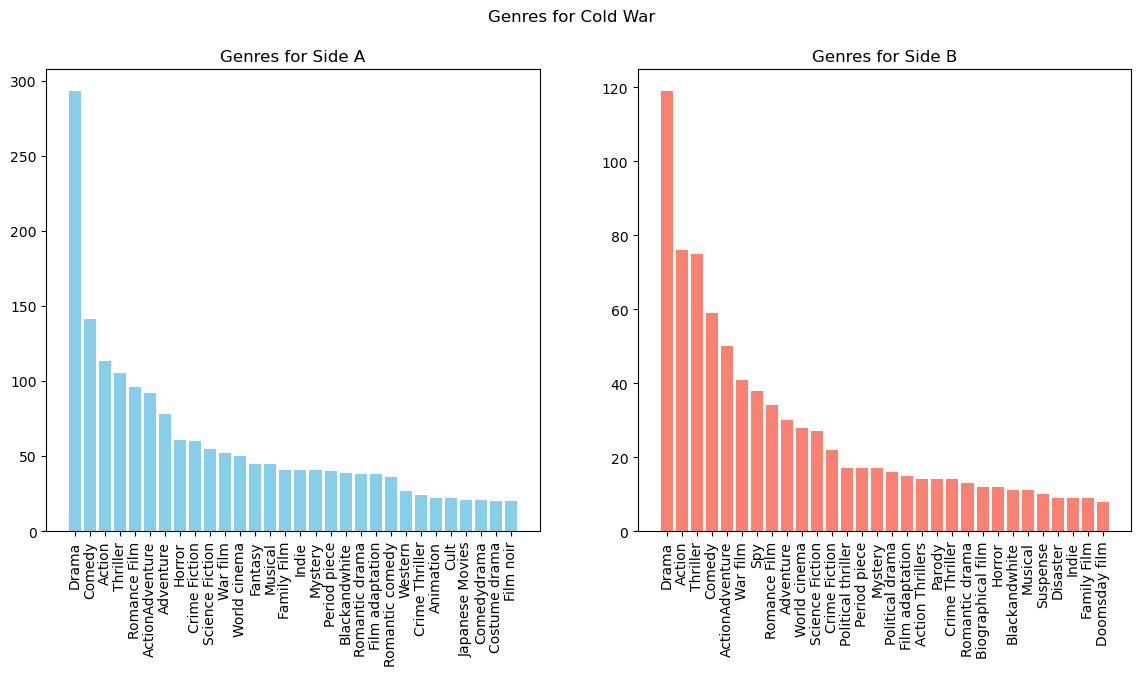

Side A: ['United States of America']
Side B: ['Soviet Union']
Genres unique to Side A: {'Costume drama', 'Comedydrama', 'Animation', 'Romantic comedy', 'Fantasy', 'Japanese Movies', 'Cult', 'Film noir', 'Western'}
Genres unique to Side B: {'Suspense', 'Parody', 'Disaster', 'Political thriller', 'Doomsday film', 'Spy', 'Biographical film', 'Political drama', 'Action Thrillers'}


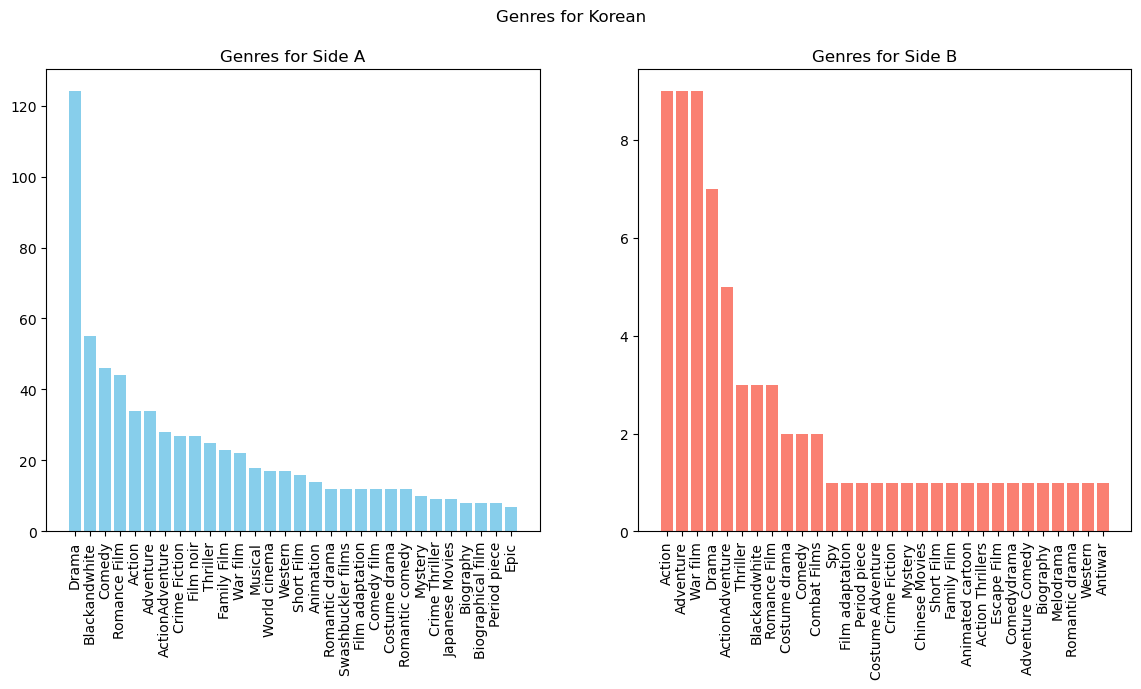

Side A: ['Belgium', 'Canada', 'Colombia', 'United Kingdom', 'Netherlands', 'Greece', 'France', 'Turkey', 'Philippines', 'Thailand', 'Ethiopia', 'Australia', 'South Korea', 'United States of America']
Side B: ['China', 'North Korea']
Genres unique to Side A: {'World cinema', 'Musical', 'Epic', 'Animation', 'Romantic comedy', 'Swashbuckler films', 'Japanese Movies', 'Crime Thriller', 'Comedy film', 'Film noir', 'Biographical film'}
Genres unique to Side B: {'Melodrama', 'Chinese Movies', 'Animated cartoon', 'Escape Film', 'Antiwar', 'Adventure Comedy', 'Combat Films', 'Comedydrama', 'Spy', 'Costume Adventure', 'Action Thrillers'}


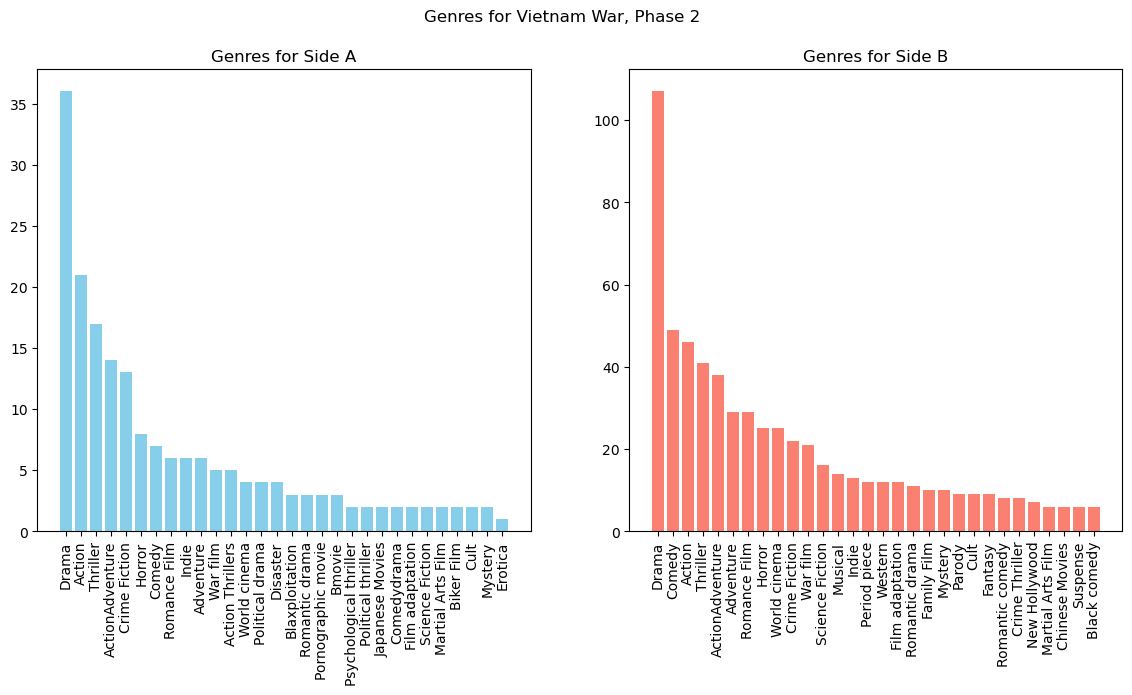

Side A: ['Vietnam']
Side B: ['United States of America', 'Cambodia', 'South Korea', 'Philippines', 'South Vietnam', 'Thailand', 'Australia']
Genres unique to Side A: {'Psychological thriller', 'Pornographic movie', 'Japanese Movies', 'Biker Film', 'Political thriller', 'Disaster', 'Erotica', 'Comedydrama', 'Bmovie', 'Political drama', 'Blaxploitation', 'Action Thrillers'}
Genres unique to Side B: {'Chinese Movies', 'Musical', 'Suspense', 'Parody', 'Family Film', 'Romantic comedy', 'Fantasy', 'Black comedy', 'Crime Thriller', 'Period piece', 'New Hollywood', 'Western'}


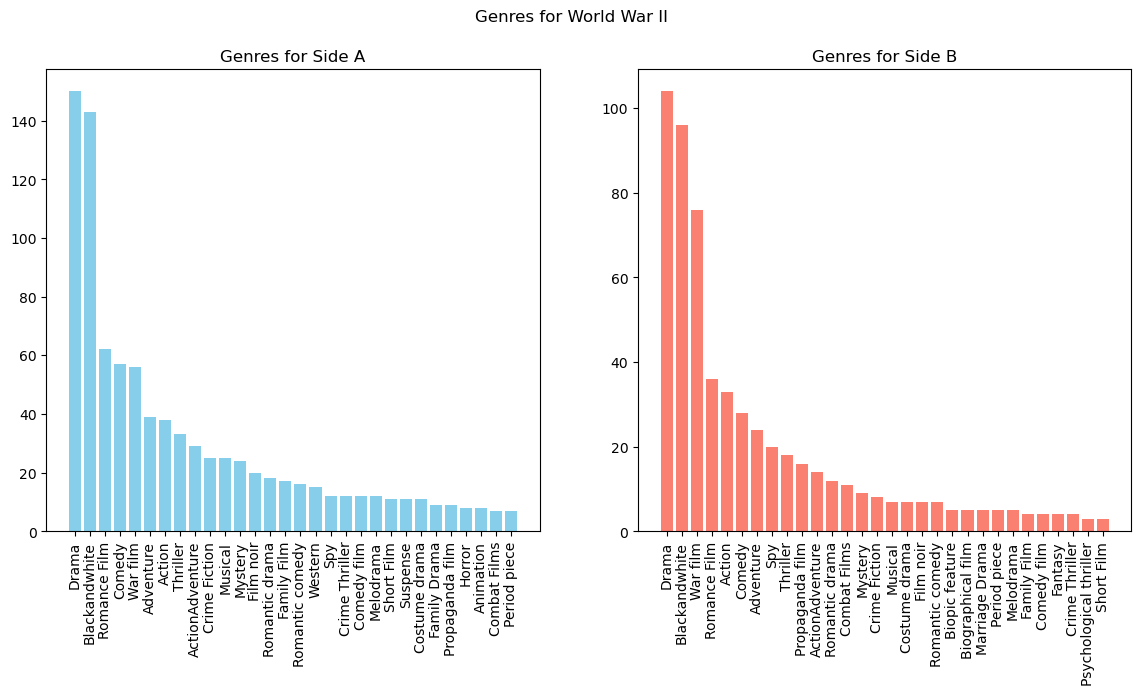

Side A: ['Belgium', 'Yugoslavia', 'Norway', 'Canada', 'United States of America', 'United Kingdom', 'Netherlands', 'Romania', 'Bulgaria', 'Greece', 'Brazil', 'Italy', 'Australia', 'New Zealand', 'USSR', 'Poland', 'France', 'Mongolia', 'China', 'South Africa', 'Ethiopia']
Side B: ['Hungary', 'France', 'Finland', 'Italy', 'Romania', 'Bulgaria', 'Germany', 'Japan']
Genres unique to Side A: {'Family Drama', 'Suspense', 'Horror', 'Animation', 'Western'}
Genres unique to Side B: {'Psychological thriller', 'Marriage Drama', 'Biopic feature', 'Fantasy', 'Biographical film'}


In [24]:
war_names_r = ["Cold War", "Korean", "Vietnam War, Phase 2", "World War II"]
for war in war_names_r:
    war_data = wars[wars.index==war]
    side_1, side_2 = find_sides(war_data)
    start_year, end_year = find_years(war_data)
    movies_war_1, movies_war_2 = find_movies_summary(movies, start_year, end_year, side_1.copy(), side_2.copy())

    all_genres_1 = movies_war_1['Genres'].dropna().apply(lambda x: x if isinstance(x, list) else x.split(','))
    genres_count_1 = Counter([genre.strip() for genres in all_genres_1 for genre in genres])
    genres_count_1_r = dict(genres_count_1.most_common(30))

    all_genres_2 = movies_war_2['Genres'].dropna().apply(lambda x: x if isinstance(x, list) else x.split(','))
    genres_count_2 = Counter([genre.strip() for genres in all_genres_2 for genre in genres])
    genres_count_2_r = dict(genres_count_2.most_common(30))

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    axes[0].bar(list(genres_count_1_r.keys()), list(genres_count_1_r.values()), color='skyblue')
    axes[0].set_xticklabels(genres_count_1_r.keys(), rotation=90)
    axes[0].set_title(f"Genres for Side A")
    axes[1].bar(list(genres_count_2_r.keys()), list(genres_count_2_r.values()), color='salmon')
    axes[1].set_xticklabels(genres_count_2_r.keys(), rotation=90)
    axes[1].set_title(f"Genres for Side B")

    plt.suptitle(f"Genres for {war}")
    plt.show()

    print(f"Side A: {side_1}")
    print(f"Side B: {side_2}")
    # Compute genre differences
    genres_1_set, genres_2_set = set(genres_count_1_r.keys()), set(genres_count_2_r.keys())
    unique_to_side_1 = genres_1_set - genres_2_set
    unique_to_side_2 = genres_2_set - genres_1_set
    print(f"Genres unique to Side A: {unique_to_side_1}")
    print(f"Genres unique to Side B: {unique_to_side_2}")

Genres unique to Side A: {'Costume drama', 'Comedydrama', 'Animation', 'Romantic comedy', 'Fantasy', 'Japanese Movies', 'Cult', 'Film noir', 'Western'}
Genres unique to Side B: {'Suspense', 'Parody', 'Disaster', 'Political thriller', 'Doomsday film', 'Spy', 'Biographical film', 'Political drama', 'Action Thrillers'}


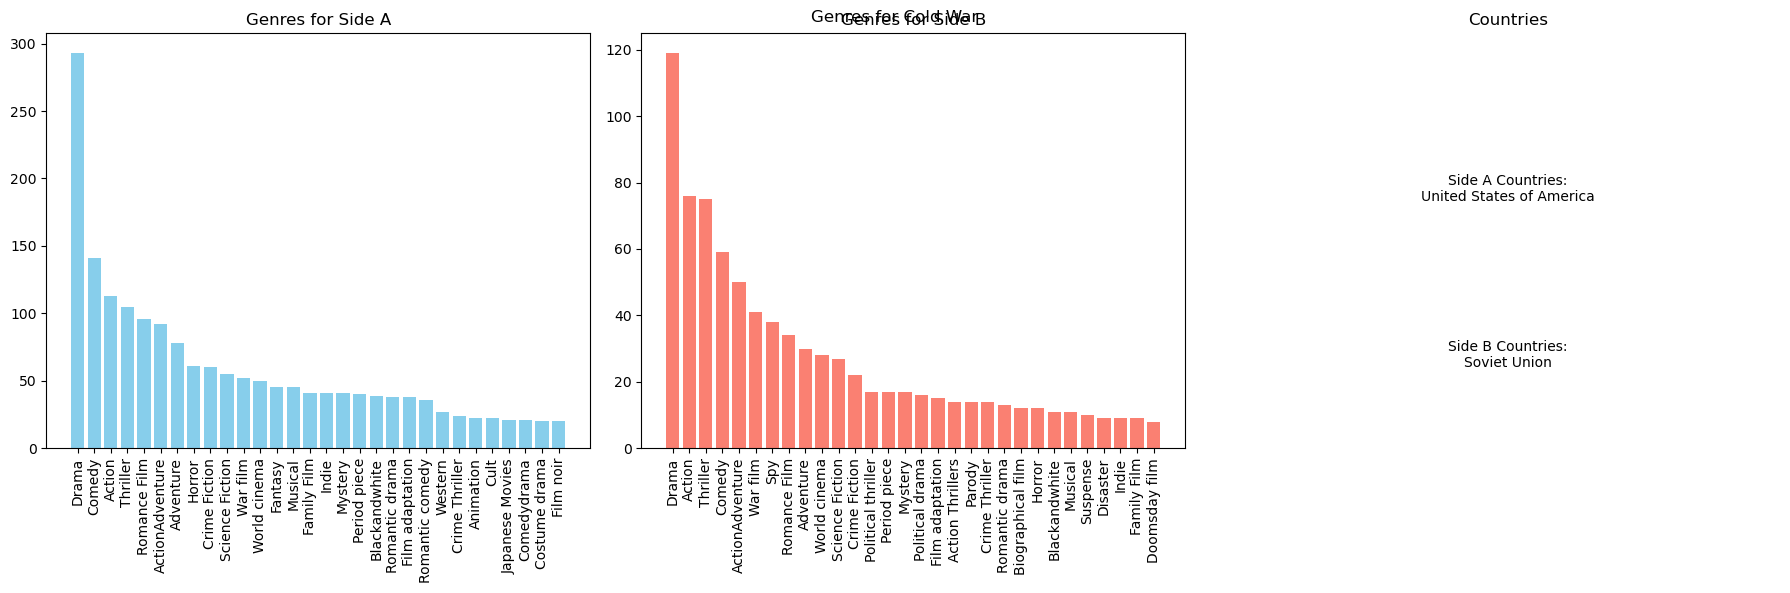

Genres unique to Side A: {'World cinema', 'Musical', 'Epic', 'Animation', 'Romantic comedy', 'Swashbuckler films', 'Japanese Movies', 'Crime Thriller', 'Comedy film', 'Film noir', 'Biographical film'}
Genres unique to Side B: {'Melodrama', 'Chinese Movies', 'Animated cartoon', 'Escape Film', 'Antiwar', 'Adventure Comedy', 'Combat Films', 'Comedydrama', 'Spy', 'Costume Adventure', 'Action Thrillers'}


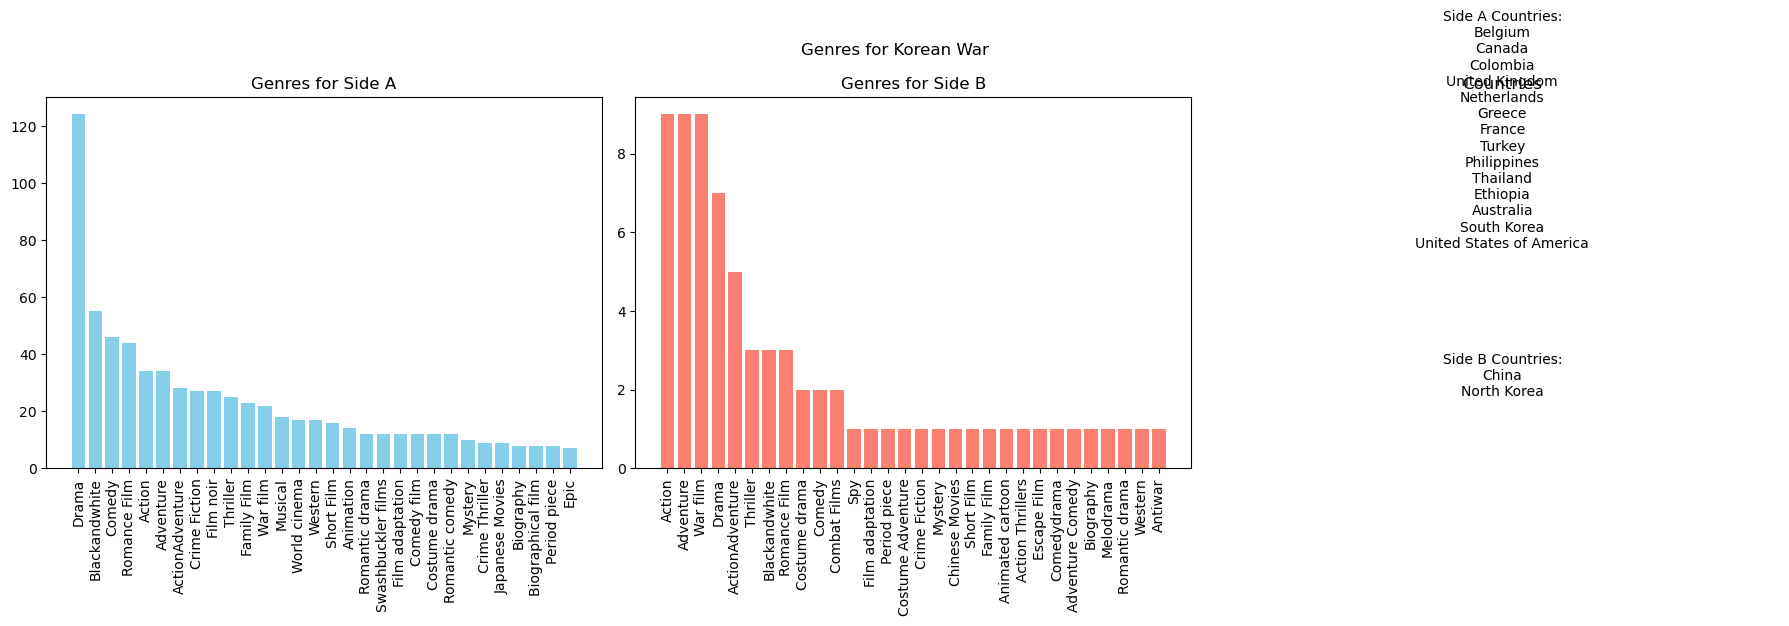

Genres unique to Side A: {'Psychological thriller', 'Pornographic movie', 'Japanese Movies', 'Biker Film', 'Political thriller', 'Disaster', 'Erotica', 'Comedydrama', 'Bmovie', 'Political drama', 'Blaxploitation', 'Action Thrillers'}
Genres unique to Side B: {'Chinese Movies', 'Musical', 'Suspense', 'Parody', 'Family Film', 'Romantic comedy', 'Fantasy', 'Black comedy', 'Crime Thriller', 'Period piece', 'New Hollywood', 'Western'}


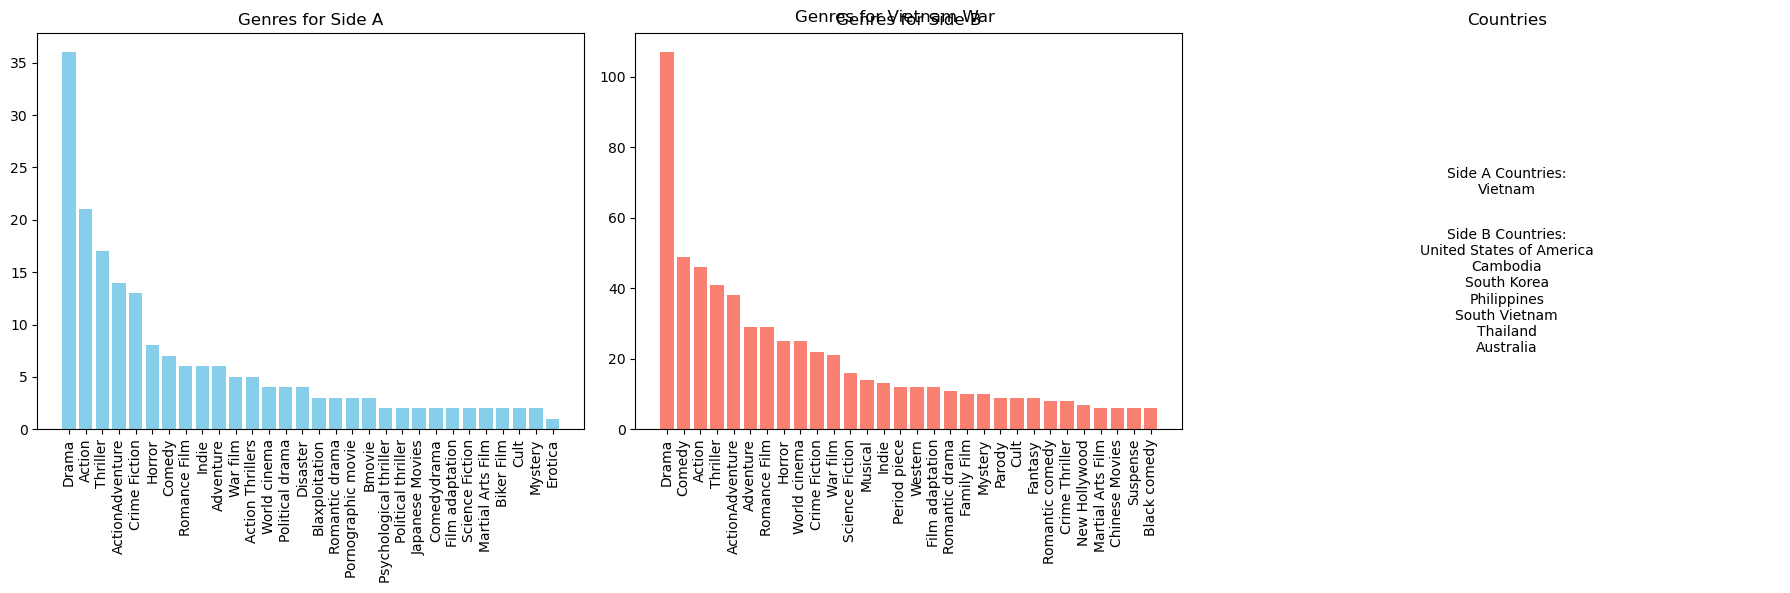

Genres unique to Side A: {'Family Drama', 'Suspense', 'Horror', 'Animation', 'Western'}
Genres unique to Side B: {'Psychological thriller', 'Marriage Drama', 'Biopic feature', 'Fantasy', 'Biographical film'}


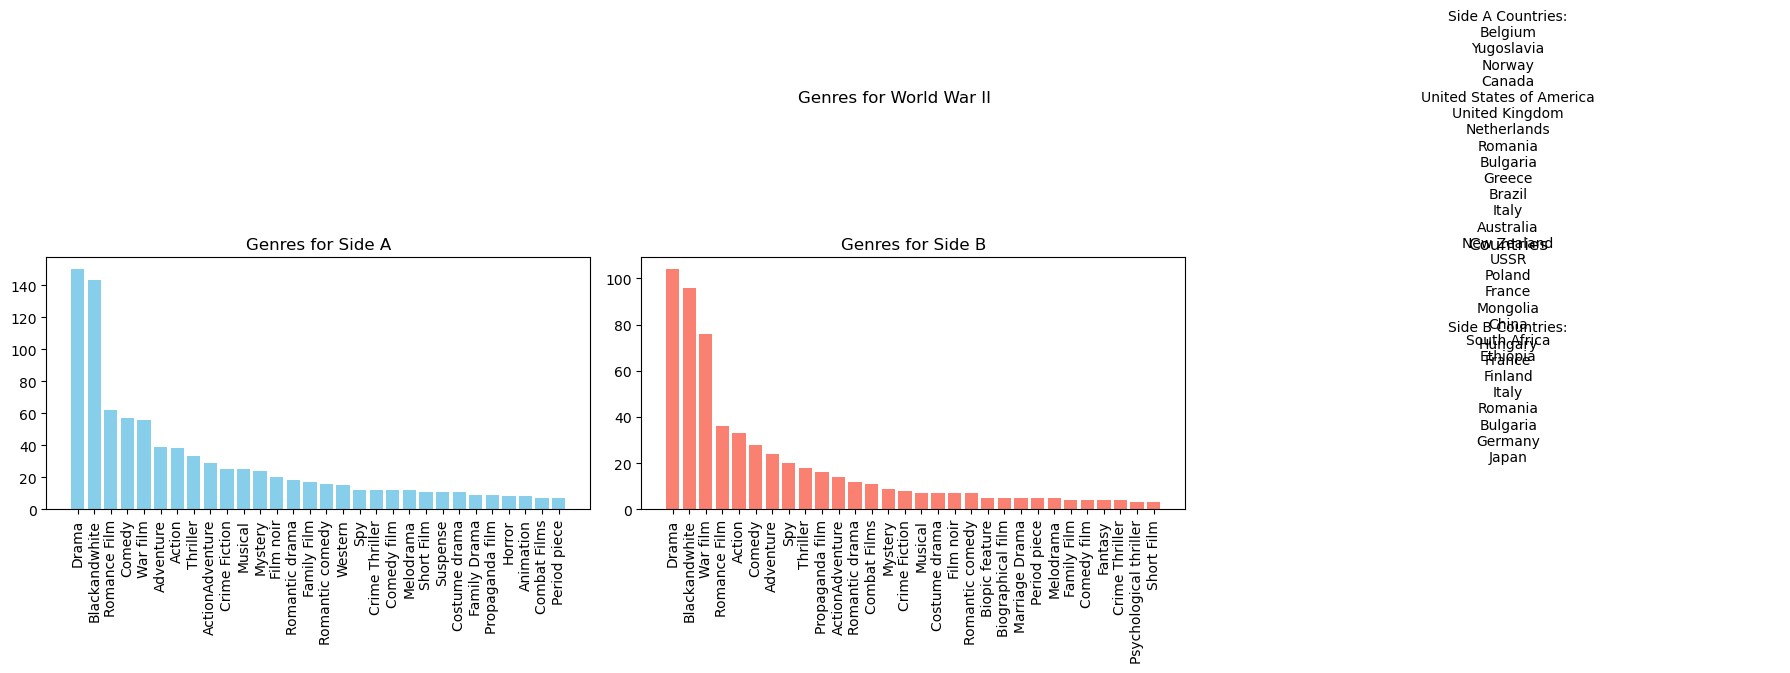

In [25]:
import matplotlib.pyplot as plt
from collections import Counter

war_names_r = ["Cold War", "Korean", "Vietnam War, Phase 2", "World War II"]
for war in war_names_r:
    war_data = wars[wars.index == war]
    if war == 'Korean': war = 'Korean War'
    elif war == 'Vietnam War, Phase 2': war = 'Vietnam War'
    side_1, side_2 = find_sides(war_data)
    side_1_copy = side_1.copy()
    side_2_copy = side_2.copy()
    start_year, end_year = find_years(war_data)
    movies_war_1, movies_war_2 = find_movies_summary(movies, start_year, end_year, side_1_copy, side_2_copy)

    all_genres_1 = movies_war_1['Genres'].dropna().apply(lambda x: x if isinstance(x, list) else x.split(','))
    genres_count_1 = Counter([genre.strip() for genres in all_genres_1 for genre in genres])
    genres_count_1_r = dict(genres_count_1.most_common(30))

    all_genres_2 = movies_war_2['Genres'].dropna().apply(lambda x: x if isinstance(x, list) else x.split(','))
    genres_count_2 = Counter([genre.strip() for genres in all_genres_2 for genre in genres])
    genres_count_2_r = dict(genres_count_2.most_common(30))

    # Compute genre differences
    genres_1_set, genres_2_set = set(genres_count_1_r.keys()), set(genres_count_2_r.keys())
    unique_to_side_1 = genres_1_set - genres_2_set
    unique_to_side_2 = genres_2_set - genres_1_set
    print(f"Genres unique to Side A: {unique_to_side_1}")
    print(f"Genres unique to Side B: {unique_to_side_2}")

    # Create figure with three subplots
    fig = plt.figure(figsize=(18, 6))
    
    # Bar plots for genre counts
    ax1 = fig.add_subplot(1, 3, 1)
    ax1.bar(list(genres_count_1_r.keys()), list(genres_count_1_r.values()), color='skyblue')
    ax1.set_xticklabels(genres_count_1_r.keys(), rotation=90)
    ax1.set_title("Genres for Side A")
    
    ax2 = fig.add_subplot(1, 3, 2)
    ax2.bar(list(genres_count_2_r.keys()), list(genres_count_2_r.values()), color='salmon')
    ax2.set_xticklabels(genres_count_2_r.keys(), rotation=90)
    ax2.set_title("Genres for Side B")
    
    # Display lists of countries
    ax3 = fig.add_subplot(1, 3, 3)
    side_1_countries = "\n".join(side_1)
    side_2_countries = "\n".join(side_2)
    ax3.text(0.5, 0.6, f"Side A Countries:\n{side_1_countries}", ha='center', fontsize=10, wrap=True)
    ax3.text(0.5, 0.2, f"Side B Countries:\n{side_2_countries}", ha='center', fontsize=10, wrap=True)
    ax3.axis('off')
    ax3.set_title("Countries")
    
    plt.tight_layout()
    plt.suptitle(f"Genres for {war}")
    plt.show()


Genres unique to Side A (['United States of America', 'USA']): {'Costume drama', 'Comedydrama', 'Animation', 'Romantic comedy', 'Fantasy', 'Japanese Movies', 'Cult', 'Film noir', 'Western'}
Genres unique to Side B (['Soviet Union', 'Russia']): {'Suspense', 'Parody', 'Disaster', 'Political thriller', 'Doomsday film', 'Spy', 'Biographical film', 'Political drama', 'Action Thrillers'}


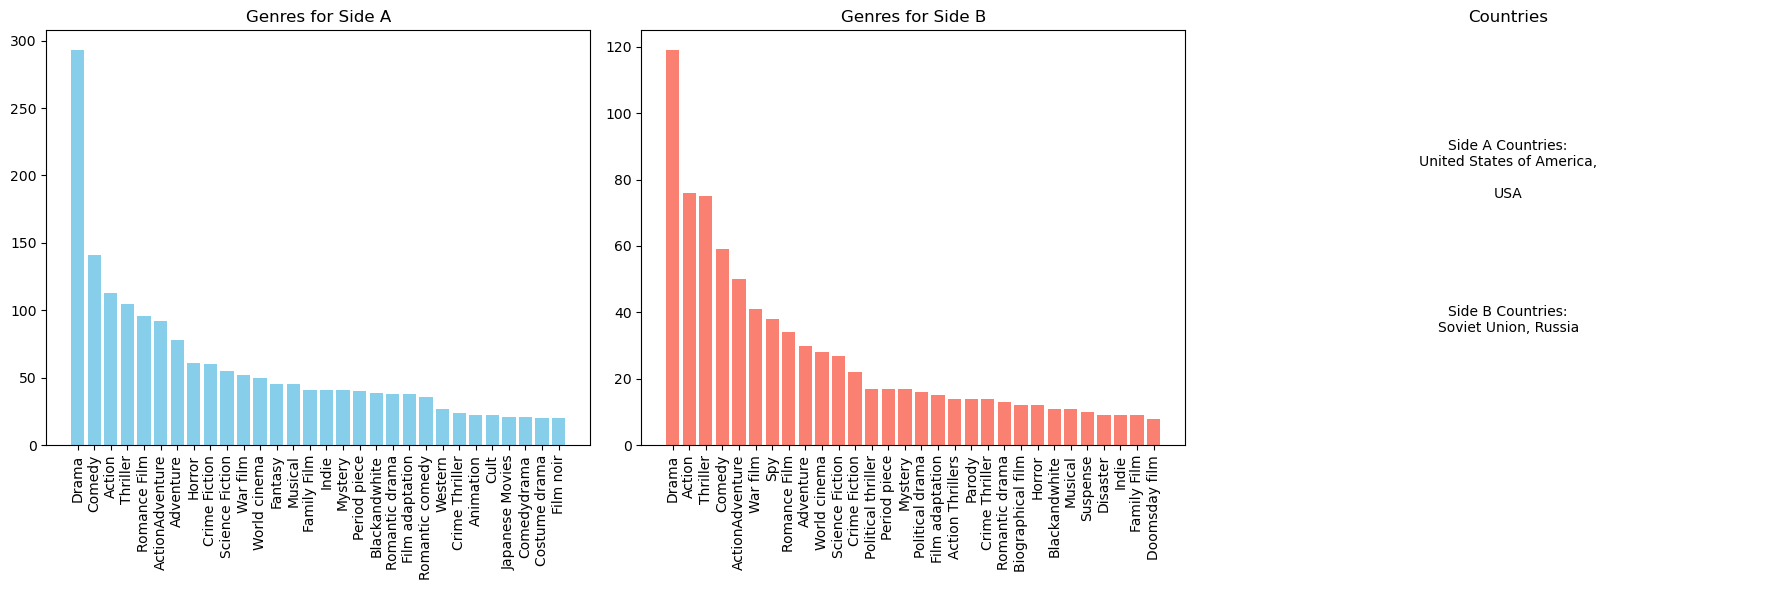

Genres unique to Side A (['Belgium', 'Canada', 'Colombia', 'United Kingdom', 'Netherlands', 'Greece', 'France', 'Turkey', 'Philippines', 'Thailand', 'Ethiopia', 'Australia', 'South Korea', 'United States of America', 'USA', 'UK']): {'World cinema', 'Musical', 'Epic', 'Animation', 'Romantic comedy', 'Swashbuckler films', 'Japanese Movies', 'Crime Thriller', 'Comedy film', 'Film noir', 'Biographical film'}
Genres unique to Side B (['China', 'North Korea']): {'Melodrama', 'Chinese Movies', 'Animated cartoon', 'Escape Film', 'Antiwar', 'Adventure Comedy', 'Combat Films', 'Comedydrama', 'Spy', 'Costume Adventure', 'Action Thrillers'}


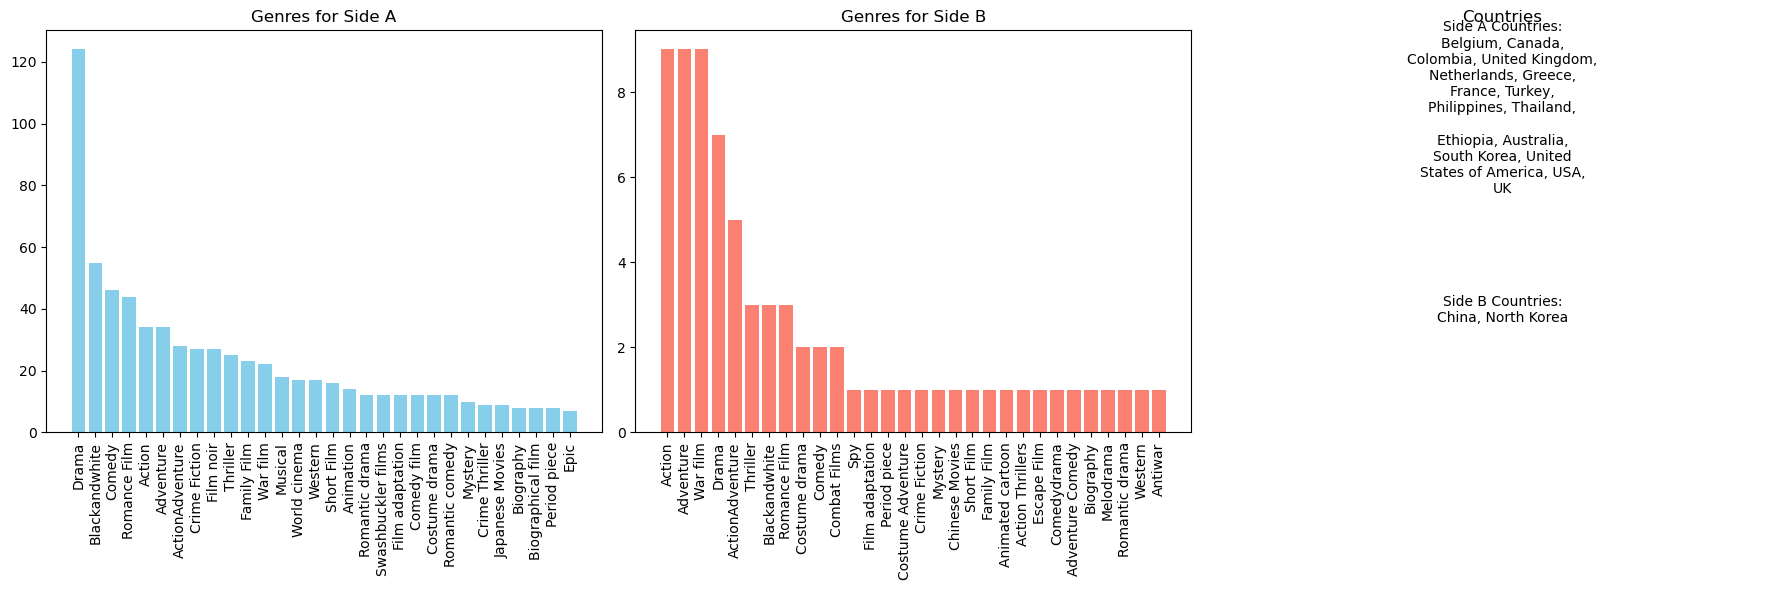

Genres unique to Side A (['Vietnam']): {'Psychological thriller', 'Pornographic movie', 'Japanese Movies', 'Biker Film', 'Political thriller', 'Disaster', 'Erotica', 'Comedydrama', 'Bmovie', 'Political drama', 'Blaxploitation', 'Action Thrillers'}
Genres unique to Side B (['United States of America', 'Cambodia', 'South Korea', 'Philippines', 'South Vietnam', 'Thailand', 'Australia', 'USA']): {'Chinese Movies', 'Musical', 'Suspense', 'Parody', 'Family Film', 'Romantic comedy', 'Fantasy', 'Black comedy', 'Crime Thriller', 'Period piece', 'New Hollywood', 'Western'}


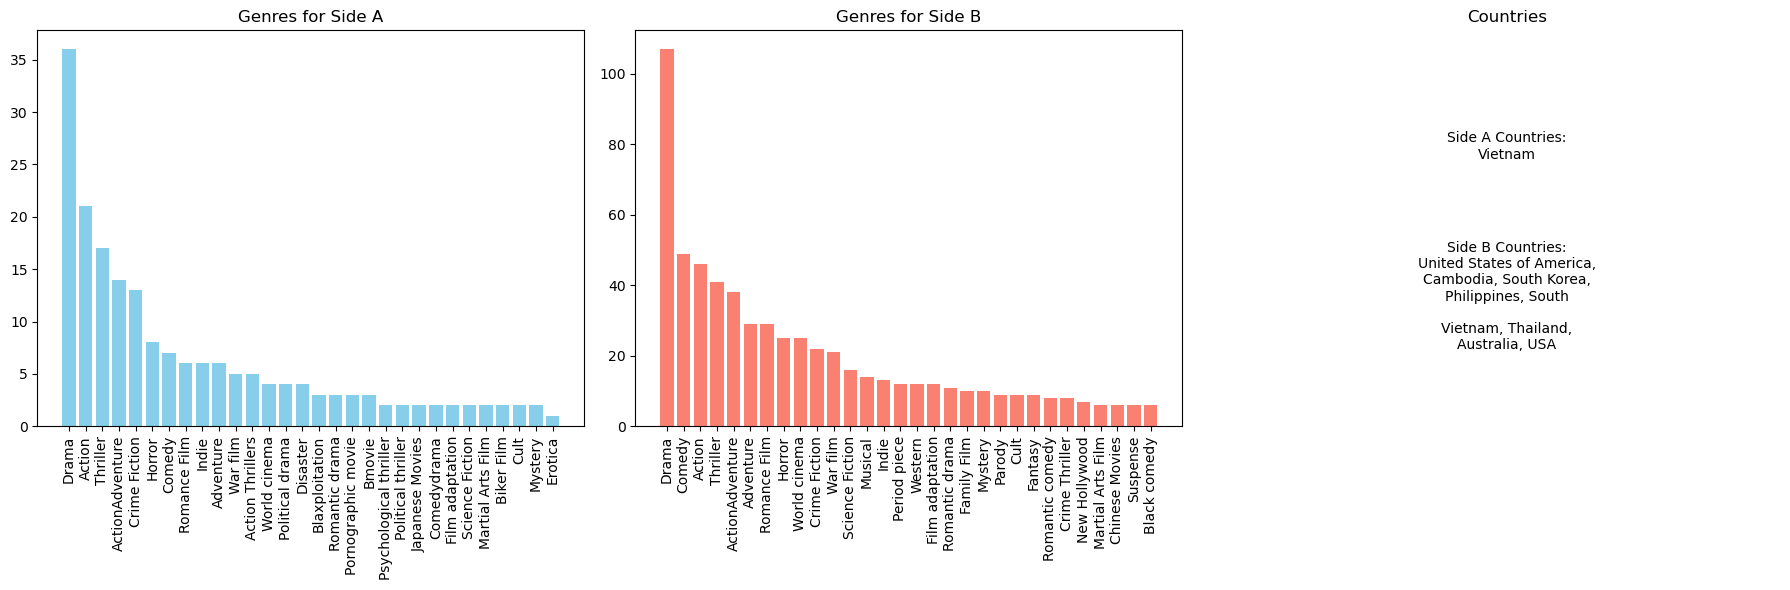

Genres unique to Side A (['Belgium', 'Yugoslavia', 'Norway', 'Canada', 'United States of America', 'United Kingdom', 'Netherlands', 'Romania', 'Bulgaria', 'Greece', 'Brazil', 'Italy', 'Australia', 'New Zealand', 'USSR', 'Poland', 'France', 'Mongolia', 'China', 'South Africa', 'Ethiopia', 'USA', 'UK']): {'Family Drama', 'Suspense', 'Horror', 'Animation', 'Western'}
Genres unique to Side B (['Hungary', 'France', 'Finland', 'Italy', 'Romania', 'Bulgaria', 'Germany', 'Japan']): {'Psychological thriller', 'Marriage Drama', 'Biopic feature', 'Fantasy', 'Biographical film'}


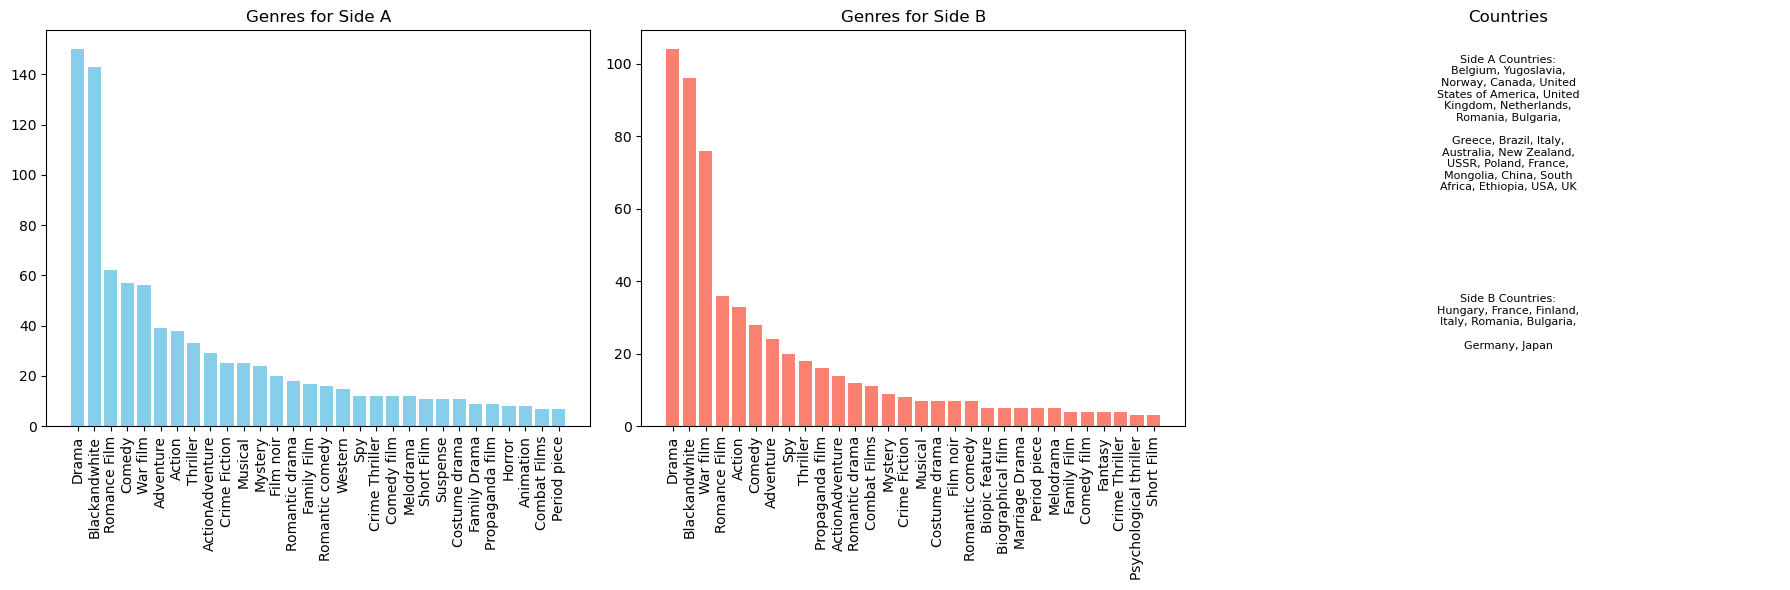

In [26]:
import matplotlib.pyplot as plt
from collections import Counter
import textwrap

def format_country_list(countries, max_width=30, columns=2):
    """Split long country lists into multiple columns."""
    wrapped_text = "\n".join(textwrap.fill(", ".join(countries), max_width).split("\n"))
    column_text = wrapped_text.split("\n")
    lines_per_column = len(column_text) // columns + (len(column_text) % columns > 0)
    formatted = ""
    for i in range(columns):
        column_slice = column_text[i * lines_per_column:(i + 1) * lines_per_column]
        formatted += "\n".join(column_slice) + ("\n\n" if i < columns - 1 else "")
    return formatted

war_names_r = ["Cold War", "Korean", "Vietnam War, Phase 2", "World War II"]
for war in war_names_r:
    war_data = wars[wars.index == war]
    side_1, side_2 = find_sides(war_data)
    start_year, end_year = find_years(war_data)
    movies_war_1, movies_war_2 = find_movies_summary(movies, start_year, end_year, side_1, side_2)

    all_genres_1 = movies_war_1['Genres'].dropna().apply(lambda x: x if isinstance(x, list) else x.split(','))
    genres_count_1 = Counter([genre.strip() for genres in all_genres_1 for genre in genres])
    genres_count_1_r = dict(genres_count_1.most_common(30))

    all_genres_2 = movies_war_2['Genres'].dropna().apply(lambda x: x if isinstance(x, list) else x.split(','))
    genres_count_2 = Counter([genre.strip() for genres in all_genres_2 for genre in genres])
    genres_count_2_r = dict(genres_count_2.most_common(30))

    # Compute genre differences
    genres_1_set, genres_2_set = set(genres_count_1_r.keys()), set(genres_count_2_r.keys())
    unique_to_side_1 = genres_1_set - genres_2_set
    unique_to_side_2 = genres_2_set - genres_1_set
    print(f"Genres unique to Side A ({side_1}): {unique_to_side_1}")
    print(f"Genres unique to Side B ({side_2}): {unique_to_side_2}")

    # Prepare country lists
    formatted_side_1 = format_country_list(side_1, max_width=25)
    formatted_side_2 = format_country_list(side_2, max_width=25)

    # Create figure with three subplots
    fig = plt.figure(figsize=(18, 6))
    
    # Bar plots for genre counts
    ax1 = fig.add_subplot(1, 3, 1)
    ax1.bar(list(genres_count_1_r.keys()), list(genres_count_1_r.values()), color='skyblue')
    ax1.set_xticklabels(genres_count_1_r.keys(), rotation=90)
    ax1.set_title("Genres for Side A")
    
    ax2 = fig.add_subplot(1, 3, 2)
    ax2.bar(list(genres_count_2_r.keys()), list(genres_count_2_r.values()), color='salmon')
    ax2.set_xticklabels(genres_count_2_r.keys(), rotation=90)
    ax2.set_title("Genres for Side B")
    
    # Display lists of countries
    ax3 = fig.add_subplot(1, 3, 3)
    font_size = 10 if len(side_1) + len(side_2) < 30 else 8
    ax3.text(0.5, 0.6, f"Side A Countries:\n{formatted_side_1}", ha='center', fontsize=font_size, wrap=True)
    ax3.text(0.5, 0.2, f"Side B Countries:\n{formatted_side_2}", ha='center', fontsize=font_size, wrap=True)
    ax3.axis('off')
    ax3.set_title("Countries")
    
    plt.tight_layout()
    plt.show()


### Analysis Pt II - By War in Summary

Movies about Cold War: 51


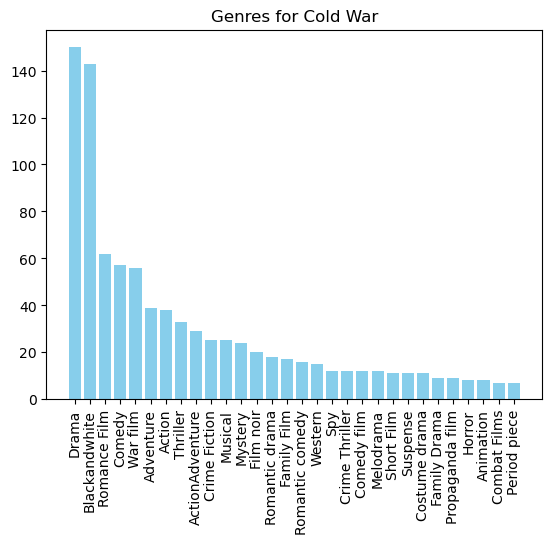

Movies about Korean War: 71


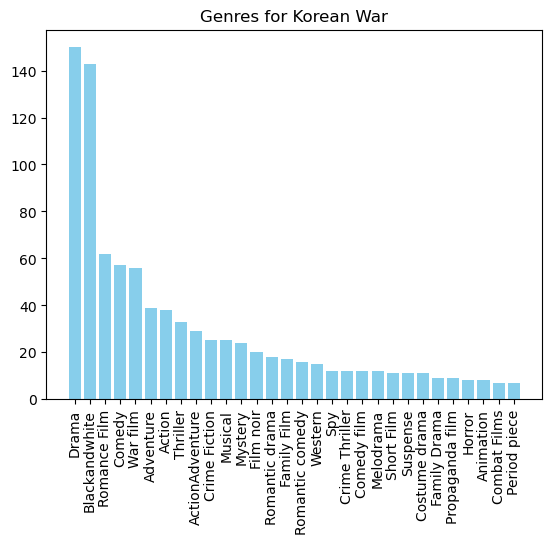

Movies about Vietnam War: 126


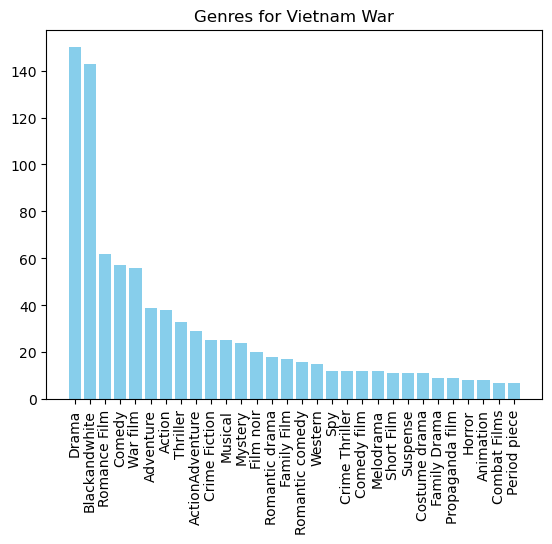

Movies about World War II: 601


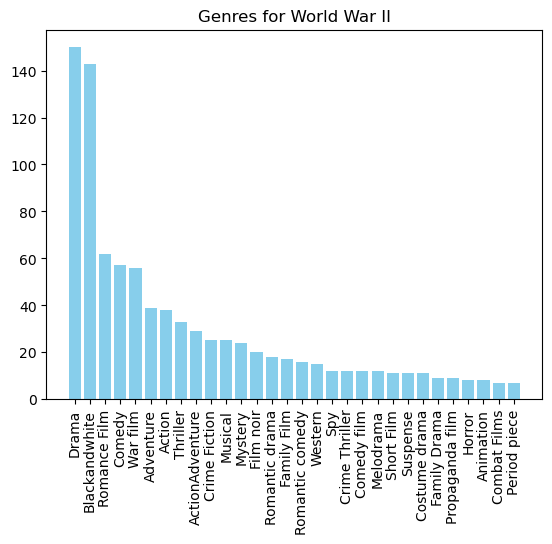

In [27]:
for war in war_names_r:
    if war == 'Korean': war = 'Korean War'
    elif war == 'Vietnam War, Phase 2': war = 'Vietnam War'
    movies_war = movies[movies['summary'].apply(lambda x: war.lower() in x.lower())]
    print(f"Movies about {war}: {len(movies_war)}")
    all_genres = movies_war['Genres'].dropna().apply(lambda x: x if isinstance(x, list) else x.split(','))
    genres_count = Counter([genre.strip() for genres in all_genres for genre in genres])
    genres_count_r = dict(genres_count.most_common(30))
    plt.bar(list(genres_count_1_r.keys()), list(genres_count_1_r.values()), color='skyblue')
    plt.xticks(rotation=90)
    plt.title(f"Genres for {war}")
    plt.show()

In [28]:
for war in war_names_r:
    if war == 'Korean': war = 'Korean War'
    elif war == 'Vietnam War, Phase 2': war = 'Vietnam War'
    movies_war = movies[movies['summary'].apply(lambda x: war.lower() in x.lower())]
    side_1, side_2 = find_sides(wars[wars.index==war])
    movies_war_1, movies_war_2 = find_movies(movies_war, movies_war['Year'].min(), movies_war['Year'].max(), side_1.copy(), side_2.copy(), threshold=0)
    # movies_war_1, movies_war_2 = find_movies_summary(movies_war, movies_war['Year'].min(), movies_war['Year'].max(), side_1.copy(), side_2.copy(), threshold=0)
    print(f"Movies about {war}: {len(movies_war)}")
    print(f"Movies for side 1: {len(movies_war_1)}")
    print(f"Movies for side 2: {len(movies_war_2)}")


Movies about Cold War: 51
Movies for side 1: 24
Movies for side 2: 1
Movies about Korean War: 71
Movies for side 1: 0
Movies for side 2: 0
Movies about Vietnam War: 126
Movies for side 1: 0
Movies for side 2: 0
Movies about World War II: 601
Movies for side 1: 510
Movies for side 2: 96


Movies about World War II: 629
Movies for side 1: 219
Movies for side 2: 215


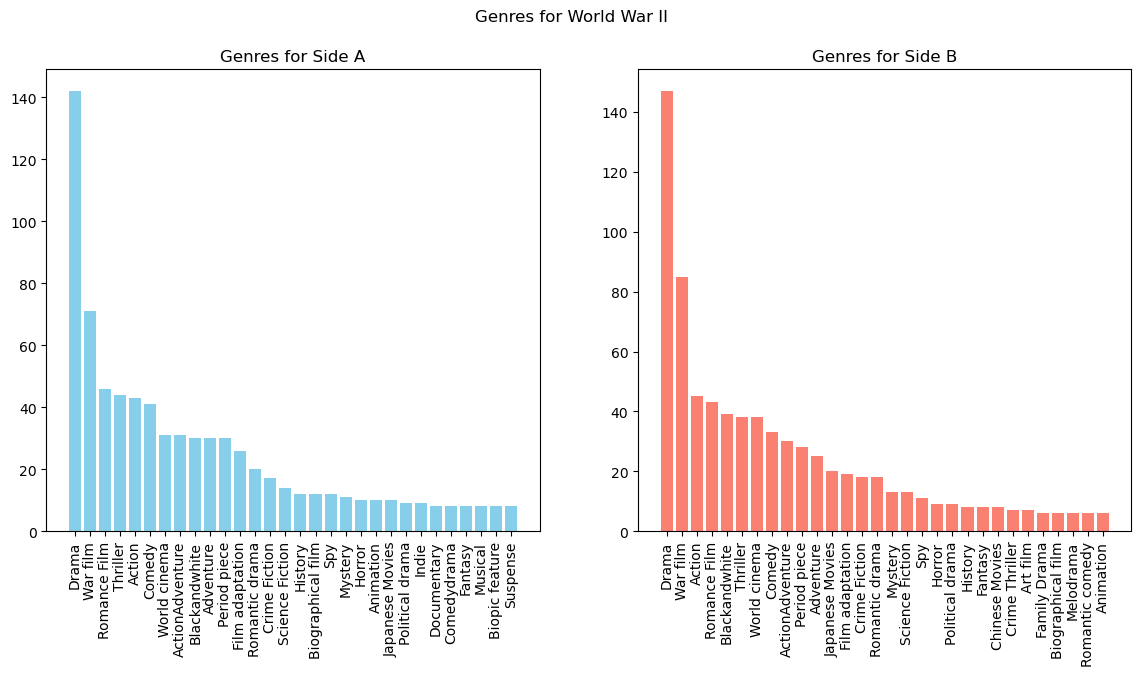

Side A: ['Belgium', 'Yugoslavia', 'Norway', 'Canada', 'United States of America', 'United Kingdom', 'Netherlands', 'Romania', 'Bulgaria', 'Greece', 'Brazil', 'Italy', 'Australia', 'New Zealand', 'USSR', 'Poland', 'France', 'Mongolia', 'China', 'South Africa', 'Ethiopia']
Side B: ['Hungary', 'France', 'Finland', 'Italy', 'Romania', 'Bulgaria', 'Germany', 'Japan']
Genres unique to Side A: {'Musical', 'Suspense', 'Indie', 'Biopic feature', 'Comedydrama', 'Documentary'}
Genres unique to Side B: {'Art film', 'Melodrama', 'Chinese Movies', 'Family Drama', 'Romantic comedy', 'Crime Thriller'}


In [29]:
movies_ww2 = movies[movies['summary'].apply(lambda x: 'world war ii' in x.lower() or 'world war 2' in x.lower() or 'wwii' in x.lower())] 
side_1, side_2 = find_sides(war_data)
movies_ww2_1, movies_ww2_2 = find_movies_summary(movies_ww2, movies_ww2['Year'].min(), movies_ww2['Year'].max(), side_1.copy(), side_2.copy(), threshold=0)
print(f"Movies about World War II: {len(movies_ww2)}")
print(f"Movies for side 1: {len(movies_ww2_1)}")
print(f"Movies for side 2: {len(movies_ww2_2)}")

all_genres_1 = movies_ww2_1['Genres'].dropna().apply(lambda x: x if isinstance(x, list) else x.split(','))
genres_count_1 = Counter([genre.strip() for genres in all_genres_1 for genre in genres])
genres_count_1_r = dict(genres_count_1.most_common(30))

all_genres_2 = movies_ww2_2['Genres'].dropna().apply(lambda x: x if isinstance(x, list) else x.split(','))
genres_count_2 = Counter([genre.strip() for genres in all_genres_2 for genre in genres])
genres_count_2_r = dict(genres_count_2.most_common(30))

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].bar(list(genres_count_1_r.keys()), list(genres_count_1_r.values()), color='skyblue')
axes[0].set_xticklabels(genres_count_1_r.keys(), rotation=90)
axes[0].set_title(f"Genres for Side A")
axes[1].bar(list(genres_count_2_r.keys()), list(genres_count_2_r.values()), color='salmon')
axes[1].set_xticklabels(genres_count_2_r.keys(), rotation=90)
axes[1].set_title(f"Genres for Side B")

plt.suptitle(f"Genres for {war}")
plt.show()

print(f"Side A: {side_1}")
print(f"Side B: {side_2}")
# Compute genre differences
genres_1_set, genres_2_set = set(genres_count_1_r.keys()), set(genres_count_2_r.keys())
unique_to_side_1 = genres_1_set - genres_2_set
unique_to_side_2 = genres_2_set - genres_1_set
print(f"Genres unique to Side A: {unique_to_side_1}")
print(f"Genres unique to Side B: {unique_to_side_2}")

Movies about Cold War: 51
Movies for side 1: 14
Movies for side 2: 10


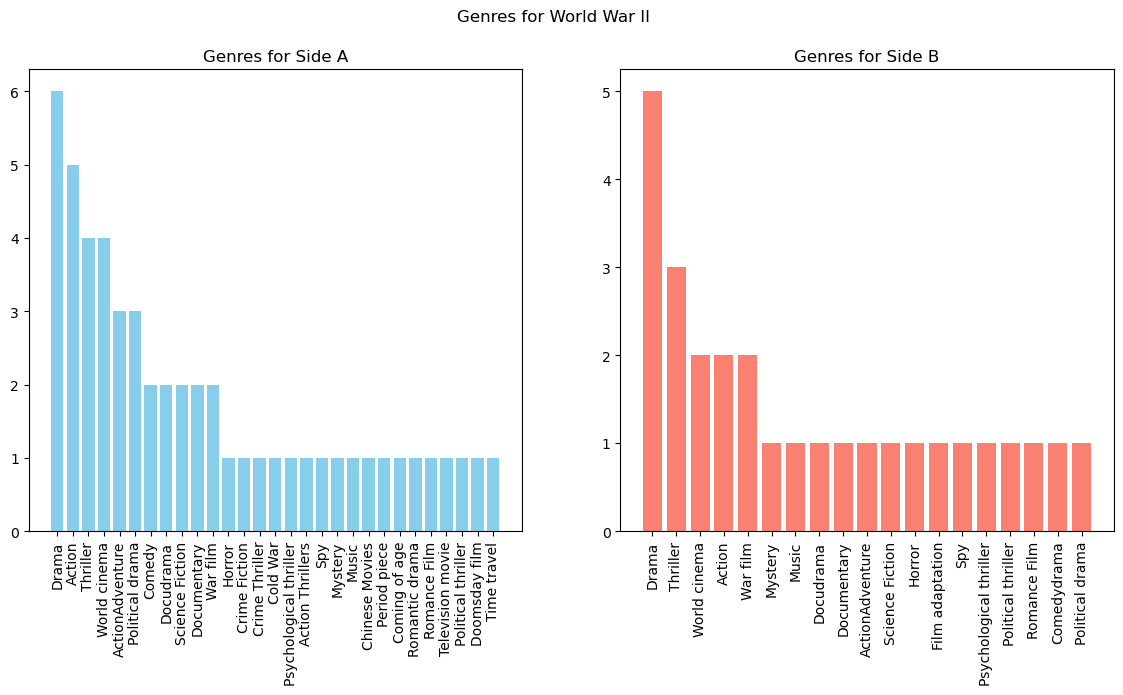

Side A: ['Belgium', 'Yugoslavia', 'Norway', 'Canada', 'United States of America', 'United Kingdom', 'Netherlands', 'Romania', 'Bulgaria', 'Greece', 'Brazil', 'Italy', 'Australia', 'New Zealand', 'USSR', 'Poland', 'France', 'Mongolia', 'China', 'South Africa', 'Ethiopia']
Side B: ['Hungary', 'France', 'Finland', 'Italy', 'Romania', 'Bulgaria', 'Germany', 'Japan']
Genres unique to Side A: {'Crime Fiction', 'Chinese Movies', 'Television movie', 'Coming of age', 'Cold War', 'Crime Thriller', 'Romantic drama', 'Time travel', 'Doomsday film', 'Period piece', 'Comedy', 'Action Thrillers'}
Genres unique to Side B: {'Comedydrama', 'Film adaptation'}


In [30]:
movies_cw = movies[movies['summary'].apply(lambda x: 'cold war' in x.lower())] 
side_1, side_2 = find_sides(war_data)
movies_cw_1, movies_cw_2 = find_movies_summary(movies_cw, movies_cw['Year'].min(), movies_cw['Year'].max(), side_1.copy(), side_2.copy(), threshold=0)
print(f"Movies about Cold War: {len(movies_cw)}")
print(f"Movies for side 1: {len(movies_cw_1)}")
print(f"Movies for side 2: {len(movies_cw_2)}")

all_genres_1 = movies_cw_1['Genres'].dropna().apply(lambda x: x if isinstance(x, list) else x.split(','))
genres_count_1 = Counter([genre.strip() for genres in all_genres_1 for genre in genres])
genres_count_1_r = dict(genres_count_1.most_common(30))

all_genres_2 = movies_cw_2['Genres'].dropna().apply(lambda x: x if isinstance(x, list) else x.split(','))
genres_count_2 = Counter([genre.strip() for genres in all_genres_2 for genre in genres])
genres_count_2_r = dict(genres_count_2.most_common(30))

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].bar(list(genres_count_1_r.keys()), list(genres_count_1_r.values()), color='skyblue')
axes[0].set_xticklabels(genres_count_1_r.keys(), rotation=90)
axes[0].set_title(f"Genres for Side A")
axes[1].bar(list(genres_count_2_r.keys()), list(genres_count_2_r.values()), color='salmon')
axes[1].set_xticklabels(genres_count_2_r.keys(), rotation=90)
axes[1].set_title(f"Genres for Side B")

plt.suptitle(f"Genres for {war}")
plt.show()

print(f"Side A: {side_1}")
print(f"Side B: {side_2}")
# Compute genre differences
genres_1_set, genres_2_set = set(genres_count_1_r.keys()), set(genres_count_2_r.keys())
unique_to_side_1 = genres_1_set - genres_2_set
unique_to_side_2 = genres_2_set - genres_1_set
print(f"Genres unique to Side A: {unique_to_side_1}")
print(f"Genres unique to Side B: {unique_to_side_2}")

### Analysis Pt III - Movies Released over Time

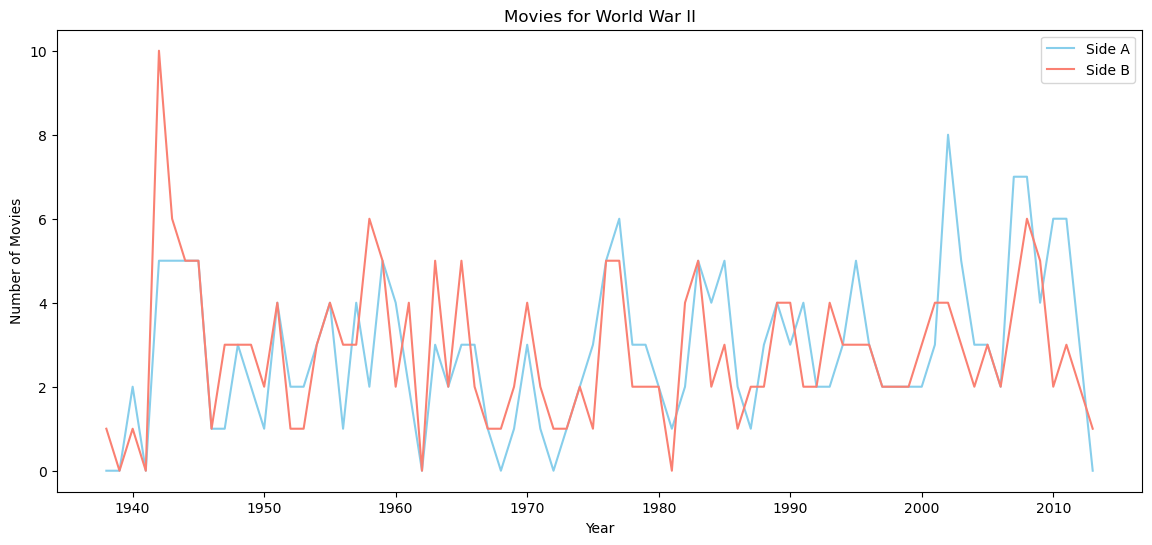

Side A: ['Belgium', 'Yugoslavia', 'Norway', 'Canada', 'United States of America', 'United Kingdom', 'Netherlands', 'Romania', 'Bulgaria', 'Greece', 'Brazil', 'Italy', 'Australia', 'New Zealand', 'USSR', 'Poland', 'France', 'Mongolia', 'China', 'South Africa', 'Ethiopia']
Side B: ['Hungary', 'France', 'Finland', 'Italy', 'Romania', 'Bulgaria', 'Germany', 'Japan']


In [31]:
# Lineplot of Years for movies_ww2_1 and movies_ww2_2
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
start_year, end_year = movies_ww2['Year'].min(), movies_ww2['Year'].max()
movies_ww2_1['Year'].value_counts().sort_index().reindex(range(start_year, end_year+1), fill_value=0).plot(ax=ax, label="Side A", color='skyblue')
movies_ww2_2['Year'].value_counts().sort_index().reindex(range(start_year, end_year+1), fill_value=0).plot(ax=ax, label="Side B", color='salmon')
ax.set_title(f"Movies for {war}")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Movies")
ax.legend()
plt.show()

print(f"Side A: {side_1}")
print(f"Side B: {side_2}")

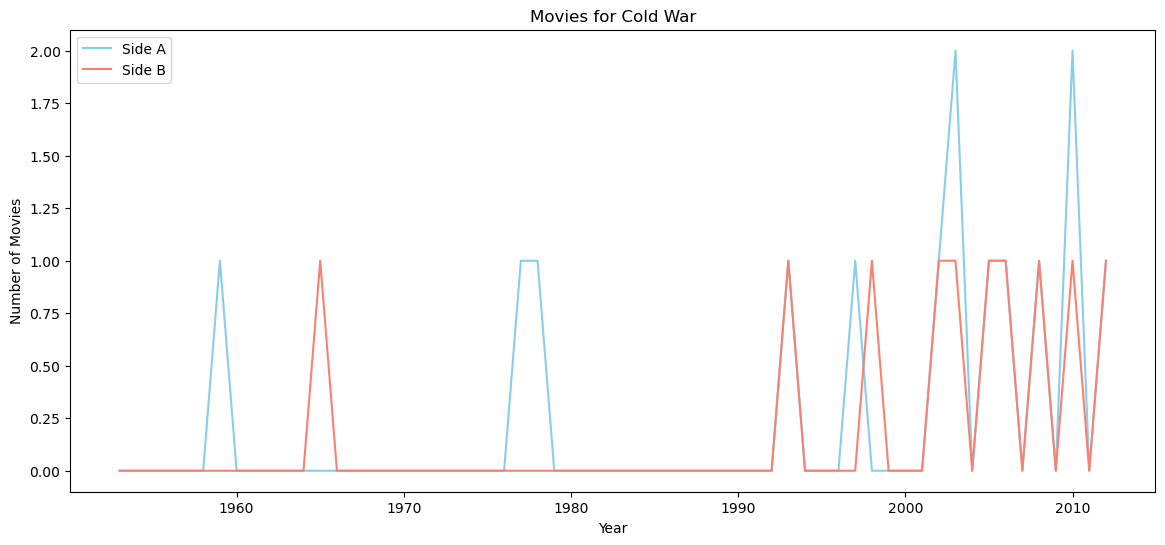

Side A: ['Belgium', 'Yugoslavia', 'Norway', 'Canada', 'United States of America', 'United Kingdom', 'Netherlands', 'Romania', 'Bulgaria', 'Greece', 'Brazil', 'Italy', 'Australia', 'New Zealand', 'USSR', 'Poland', 'France', 'Mongolia', 'China', 'South Africa', 'Ethiopia']
Side B: ['Hungary', 'France', 'Finland', 'Italy', 'Romania', 'Bulgaria', 'Germany', 'Japan']


In [32]:
# Lineplot of Years for movies_cw_1 and movies_cw_2
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
start_year, end_year = movies_cw['Year'].min(), movies_cw['Year'].max()
movies_cw_1['Year'].value_counts().sort_index().reindex(range(start_year, end_year+1), fill_value=0).plot(ax=ax, label="Side A", color='skyblue')
movies_cw_2['Year'].value_counts().sort_index().reindex(range(start_year, end_year+1), fill_value=0).plot(ax=ax, label="Side B", color='salmon')
ax.set_title(f"Movies for Cold War")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Movies")
ax.legend()
plt.show()

print(f"Side A: {side_1}")
print(f"Side B: {side_2}")

### Analysis Pt IV - Pie Charts for Release Country

Movies about Cold War: 51


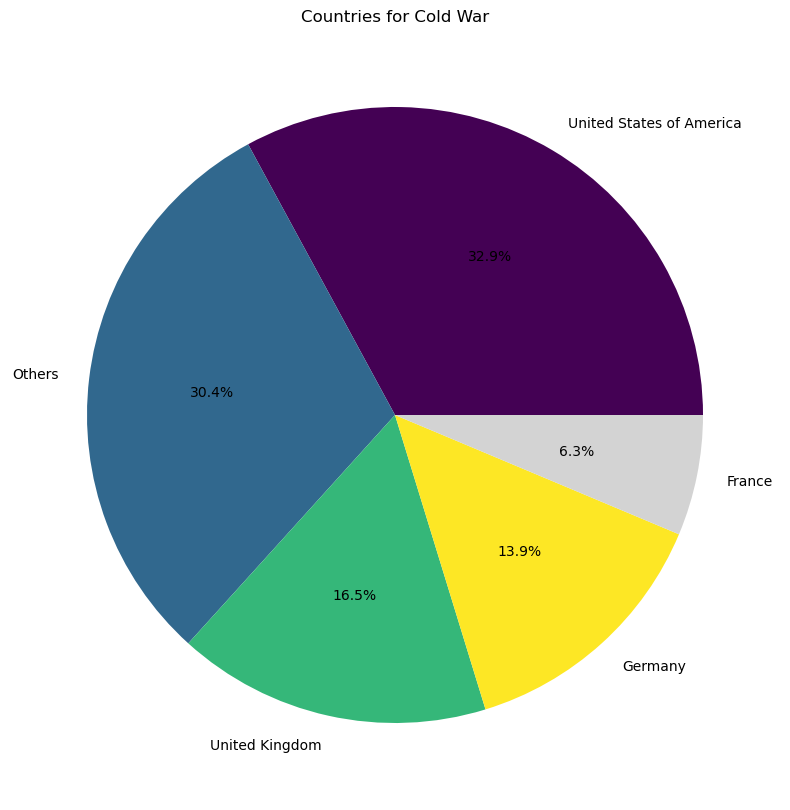

Movies about Korean War: 71


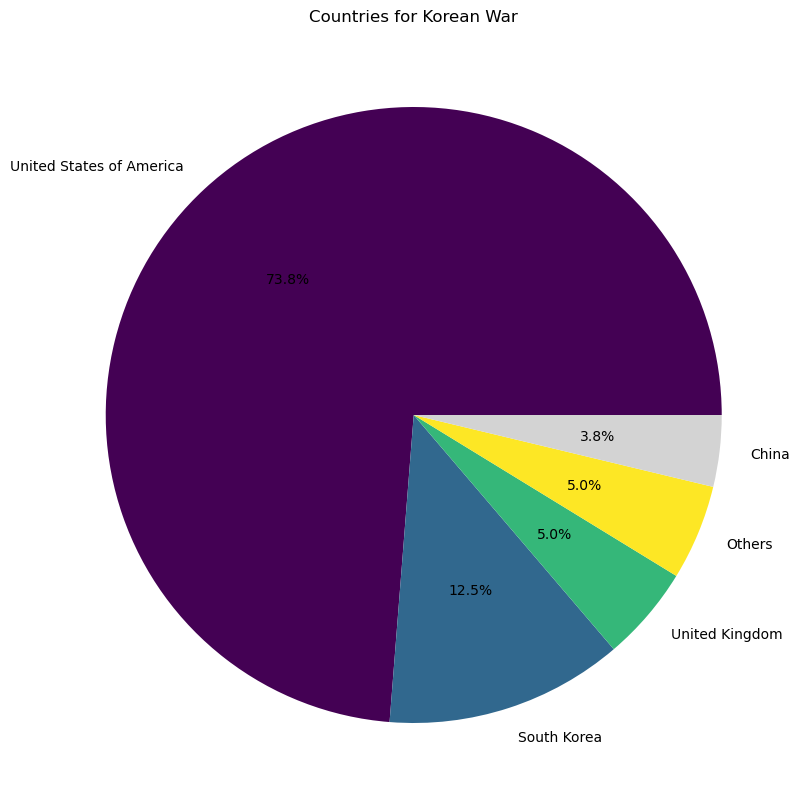

Movies about Vietnam War: 126


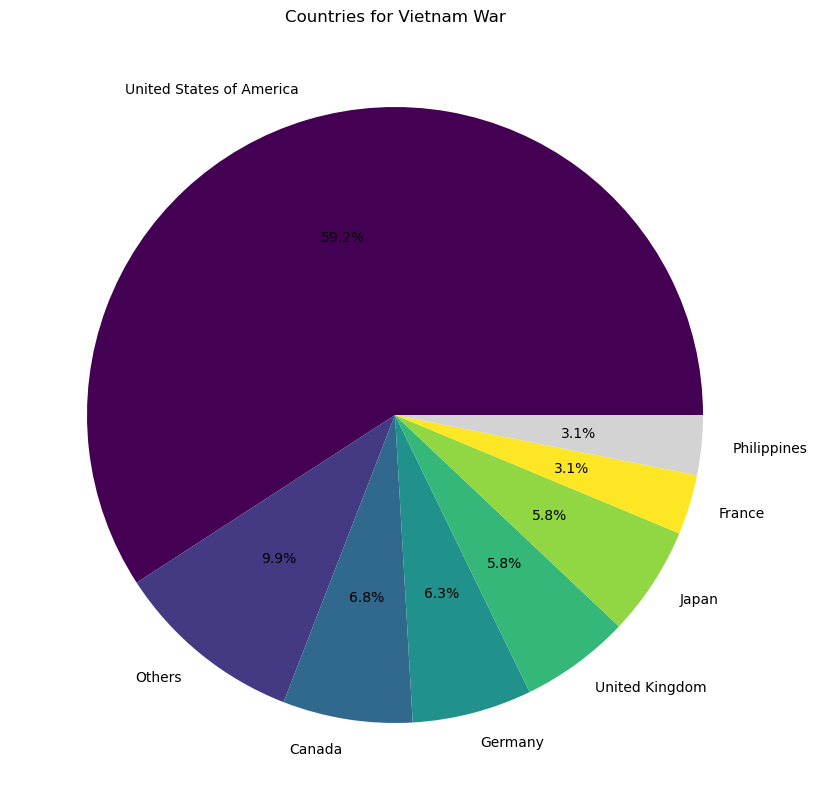

Movies about World War II: 601


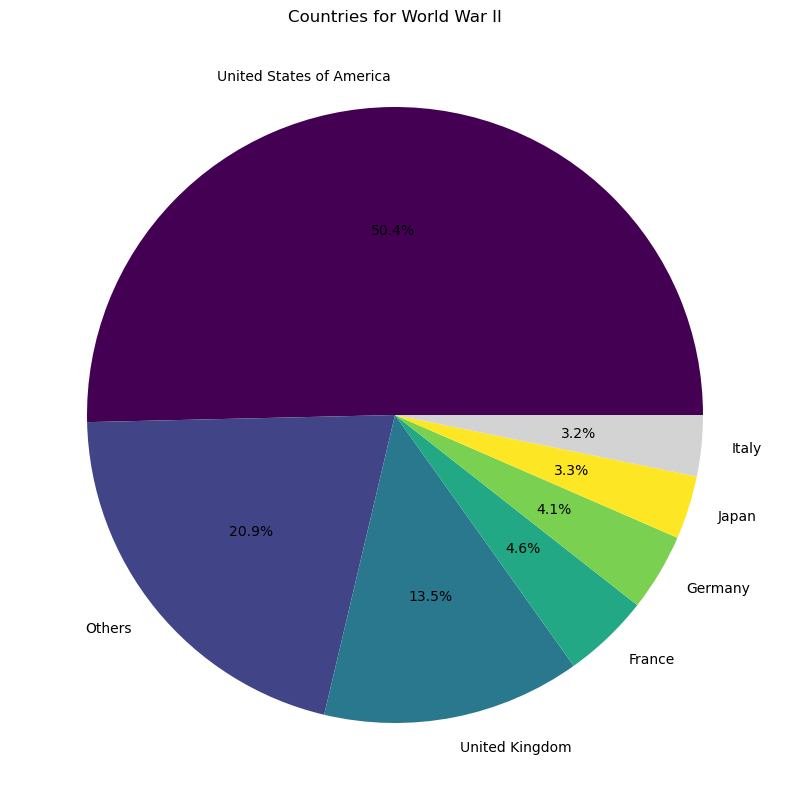

In [33]:
import numpy as np

# Plotting loop with colors only for countries above 3%
for war in war_names_r:
    if war == 'Korean': war = 'Korean War'
    elif war == 'Vietnam War, Phase 2': war = 'Vietnam War'
    movies_war = movies[movies['summary'].apply(lambda x: war.lower() in x.lower())]
    print(f"Movies about {war}: {len(movies_war)}")
    release_countries = movies_war['Countries'].apply(lambda x: x if isinstance(x, list) else x.split(','))
    release_countries = [country.strip() for countries in release_countries for country in countries]
    release_countries_count = Counter(release_countries)

    # Calculate total and percentages
    total = sum(release_countries_count.values())
    percentages = {country: count / total * 100 for country, count in release_countries_count.items()}

    # Group countries below 3% into "Others"
    grouped_countries = {country: count for country, count in release_countries_count.items() if percentages[country] >= 3}
    others_count = sum(count for country, count in release_countries_count.items() if percentages[country] < 3)
    if others_count > 0:
        grouped_countries['Others'] = others_count

    # Sort grouped countries by percentage
    sorted_countries = sorted(grouped_countries.items(), key=lambda x: x[1], reverse=True)

    # Prepare data for plotting
    labels, sizes = zip(*sorted_countries)

    # Generate colors for countries above the 3% threshold
    num_main_countries = len(labels) - 1 if 'Others' in labels else len(labels)

        # Assign colors to countries
    color_map = plt.cm.get_cmap('viridis', num_main_countries)
    color_list = color_map(np.linspace(0, 1, num_main_countries))
    colors = list(color_list)
    if 'Others' in labels:
        colors.append('lightgray')  # Add a fixed color for "Others"

    # Plot the pie chart
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
    ax.set_title(f"Countries for {war}")
    plt.show()

Movies about World War II: 601
Movies for side 1: 510
Movies for side 2: 96


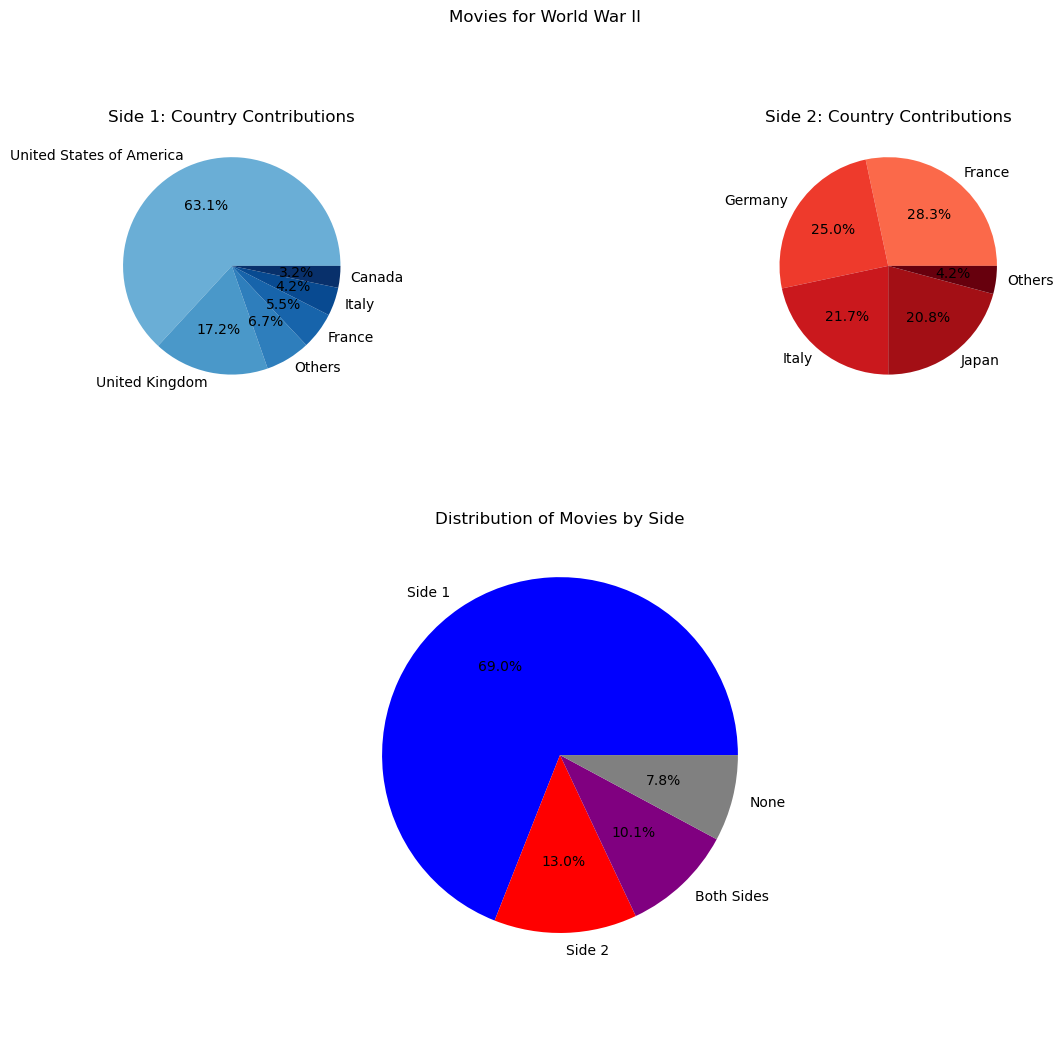

In [34]:
from matplotlib import pyplot as plt
import numpy as np
# Function to calculate country contributions for a specific side
def calculate_country_contributions(movies, side):
    release_countries = movies['Countries'].apply(lambda x: x if isinstance(x, list) else x.split(','))
    release_countries = [country.strip() for countries in release_countries for country in countries]
    release_countries_count = Counter(release_countries)
    contributions = {country: release_countries_count[country] for country in side if country in release_countries_count}

    # Apply 3% threshold
    total = sum(contributions.values())
    grouped_contributions = {country: count for country, count in contributions.items() if count / total * 100 >= 3}
    others_count = sum(count for country, count in contributions.items() if count / total * 100 < 3)
    if others_count > 0:
        grouped_contributions['Others'] = others_count

    return dict(sorted(grouped_contributions.items(), key=lambda x: x[1], reverse=True))


war = 'World War II'
movies_war = movies[movies['summary'].apply(lambda x: war.lower() in x.lower())]
print(f"Movies about {war}: {len(movies_war)}")
side_1, side_2 = find_sides(wars[wars.index==war])
movies_war_1, movies_war_2 = find_movies(movies_war, movies_war['Year'].min(), movies_war['Year'].max(), side_1.copy(), side_2.copy(), threshold=0)
print(f"Movies for side 1: {len(movies_war_1)}")
print(f"Movies for side 2: {len(movies_war_2)}")

# Movies grouped by sides
side_1_movies = movies_war_1
side_2_movies = movies_war_2
both_sides_movies = movies_war[(movies_war['Countries'].apply(lambda x: any(country in side_1 for country in x if isinstance(x, list))) &
                                movies_war['Countries'].apply(lambda x: any(country in side_2 for country in x if isinstance(x, list))))]
none_sides_movies = movies_war[~movies_war.index.isin(side_1_movies.index) &
                                ~movies_war.index.isin(side_2_movies.index) &
                                ~movies_war.index.isin(both_sides_movies.index)]

# Big central pie chart
sizes = [len(side_1_movies), len(side_2_movies), len(both_sides_movies), len(none_sides_movies)]
labels = ['Side 1', 'Side 2', 'Both Sides', 'None']
colors = ['blue', 'red', 'purple', 'gray']

# Calculate contributions for each side
side_1_contributions = calculate_country_contributions(side_1_movies, side_1)
side_2_contributions = calculate_country_contributions(side_2_movies, side_2)

# Sort contributions for cleaner visualization
side_1_contributions = dict(sorted(side_1_contributions.items(), key=lambda x: x[1], reverse=True))
side_2_contributions = dict(sorted(side_2_contributions.items(), key=lambda x: x[1], reverse=True))

# Side-specific pie charts
side_1_labels, side_1_sizes = zip(*side_1_contributions.items())
side_2_labels, side_2_sizes = zip(*side_2_contributions.items())

# Colors for smaller pies
side_1_colors = plt.cm.Blues(np.linspace(0.5, 1, len(side_1_labels)))
side_2_colors = plt.cm.Reds(np.linspace(0.5, 1, len(side_2_labels)))

# Create the figure
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
# ax.axes.get_xaxis().set_visible(False)
# ax.axes.get_yaxis().set_visible(False)
ax.axis('off')
ax_big = plt.subplot2grid((3, 4), (1, 1), rowspan=2, colspan=2)  # Big pie
ax_side_1 = plt.subplot2grid((3, 3), (0, 0))  # Side 1 pie
ax_side_2 = plt.subplot2grid((3, 3), (0, 2))  # Side 2 pie

# Plot big central pie chart
ax_big.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
ax_big.set_title("Distribution of Movies by Side")

# Plot Side 1 pie chart
ax_side_1.pie(side_1_sizes, labels=side_1_labels, autopct='%1.1f%%', colors=side_1_colors)
ax_side_1.set_title("Side 1: Country Contributions")

# Plot Side 2 pie chart
ax_side_2.pie(side_2_sizes, labels=side_2_labels, autopct='%1.1f%%', colors=side_2_colors)
ax_side_2.set_title("Side 2: Country Contributions")

# Add connecting lines
# for ax_from, ax_to, line_color in [(ax_big, ax_side_1, 'blue'), (ax_big, ax_side_2, 'red')]:
#     ax_from.annotate("", xy=(0, 0), xytext=(0.5, 0.5), arrowprops=dict(arrowstyle="-", color=line_color, lw=1.5))

plt.suptitle(f"Movies for {war}")
plt.tight_layout()
plt.show()
